# This Notebook uses RSEM coutns

In [1]:
library(repr)
options(repr.plot.width=14, repr.plot.height=12)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(DESeq2)
library(apeglm)
library(pheatmap)
library(EnhancedVolcano)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply

In [4]:
library(WriteXLS)

In [5]:
setwd('/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/')

In [6]:
list.files('.', 'rsem')

[1] "rsem_counts_B1B2_combined.csv"

In [7]:
# read in counts
cnts <- read.csv(file = 'rsem_counts_B1B2_combined.csv', stringsAsFactors = F)
# remove some gene_ids
remove_gene_ids <- read_table("RNAseq_remove_gene_id_list.txt", col_names = F) %>% pull(X1)
cnts <- filter(cnts, !gene_id %in% remove_gene_ids)

Parsed with column specification:
cols(
  X1 = col_character()
)



In [8]:
cnts %>% dim

[1] 58762    46

In [9]:
cnts %>% head

,gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003.14,TSPAN6,817.0001,966.0001,789.0001,1226.0001,757.0001,723.0001,991.0001,1400.0001,⋯,1262.0001,2215.0001,1604.0001,2076.0001,1064.0001,2301.0001,175.0001,457.0001,294.0001,584.0001
2,ENSG00000000005.6,TNMD,19.0001,0.0001,0.0001,11.0001,11.0001,14.0001,1.0001,11.0001,⋯,0.0001,2.0001,0.0001,0.0001,0.0001,1.0001,0.0001,0.0001,0.0001,0.0001
3,ENSG00000000419.12,DPM1,762.0001,731.0001,746.0001,908.0001,809.0001,644.0001,516.0001,1264.0001,⋯,853.0001,901.0001,797.0001,791.0001,345.0001,1147.0001,378.0001,400.0001,255.0001,567.0001
4,ENSG00000000457.14,SCYL3,20.5201,67.4201,49.0501,70.2001,28.5701,27.2601,56.7901,14.3201,⋯,0.0001,58.1201,129.1501,46.1601,82.9401,80.7301,46.0801,31.0001,111.0001,124.8201
5,ENSG00000000460.17,C1orf112,114.4801,211.6401,160.9501,266.8001,153.4301,145.7401,101.2101,253.6701,⋯,146.0001,165.8801,114.8501,187.8401,118.0601,126.2701,54.9201,0.0001,0.0001,1.1801
6,ENSG00000000938.13,FGR,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,⋯,0.0001,0.0001,0.0001,0.0001,0.0001,2.0001,0.0001,0.0001,0.0001,0.0001


In [10]:
cnts[,3:46] <- apply(cnts[,3:46],2, as.integer) # convert rsem floating data to integer

In [11]:
cnts %>% head

,gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000000003.14,TSPAN6,817,966,789,1226,757,723,991,1400,⋯,1262,2215,1604,2076,1064,2301,175,457,294,584
2,ENSG00000000005.6,TNMD,19,0,0,11,11,14,1,11,⋯,0,2,0,0,0,1,0,0,0,0
3,ENSG00000000419.12,DPM1,762,731,746,908,809,644,516,1264,⋯,853,901,797,791,345,1147,378,400,255,567
4,ENSG00000000457.14,SCYL3,20,67,49,70,28,27,56,14,⋯,0,58,129,46,82,80,46,31,111,124
5,ENSG00000000460.17,C1orf112,114,211,160,266,153,145,101,253,⋯,146,165,114,187,118,126,54,0,0,1
6,ENSG00000000938.13,FGR,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,2,0,0,0,0


In [12]:
cnts <- cnts %>% column_to_rownames('gene_id') 

In [13]:
str(cnts)
head(cnts)

'data.frame':	58762 obs. of  45 variables:
 $ gene_name: chr  "TSPAN6" "TNMD" "DPM1" "SCYL3" ...
 $ S01_B1   : int  817 19 762 20 114 0 0 229 146 168 ...
 $ S01_B2   : int  966 0 731 67 211 0 1 396 60 237 ...
 $ S02_B1   : int  789 0 746 49 160 0 0 190 177 145 ...
 $ S02_B2   : int  1226 11 908 70 266 0 0 409 330 248 ...
 $ S03_B1   : int  757 11 809 28 153 0 0 277 202 72 ...
 $ S03_B2   : int  723 14 644 27 145 0 0 140 205 206 ...
 $ S04_B1   : int  991 1 516 56 101 0 0 229 39 148 ...
 $ S04_B2   : int  1400 11 1264 14 253 0 1 523 401 194 ...
 $ S05_B1   : int  1194 0 340 65 148 0 0 313 131 292 ...
 $ S05_B2   : int  1732 14 1031 37 271 0 0 557 366 247 ...
 $ S06_B1   : int  1093 0 597 40 94 0 0 546 78 202 ...
 $ S06_B2   : int  2456 19 1772 41 361 0 4 691 579 471 ...
 $ S07_B1   : int  739 0 390 138 0 0 0 80 54 166 ...
 $ S07_B2   : int  359 0 235 29 14 0 0 69 29 91 ...
 $ S08_B1   : int  998 0 513 168 70 0 1 209 32 224 ...
 $ S08_B2   : int  1247 1 774 43 38 0 0 212 44 379 ...
 $ S0

,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,TSPAN6,817,966,789,1226,757,723,991,1400,1194,⋯,1262,2215,1604,2076,1064,2301,175,457,294,584
ENSG00000000005.6,TNMD,19,0,0,11,11,14,1,11,0,⋯,0,2,0,0,0,1,0,0,0,0
ENSG00000000419.12,DPM1,762,731,746,908,809,644,516,1264,340,⋯,853,901,797,791,345,1147,378,400,255,567
ENSG00000000457.14,SCYL3,20,67,49,70,28,27,56,14,65,⋯,0,58,129,46,82,80,46,31,111,124
ENSG00000000460.17,C1orf112,114,211,160,266,153,145,101,253,148,⋯,146,165,114,187,118,126,54,0,0,1
ENSG00000000938.13,FGR,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,2,0,0,0,0


# Preliminary

In [13]:
mean_cnts <- apply(cnts[,2:45], 1, mean)
var_cnts <- apply(cnts[,2:45], 1, var)
df <- data.frame(mean_cnts, var_cnts)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 20500 rows containing non-finite values (stat_smooth).”


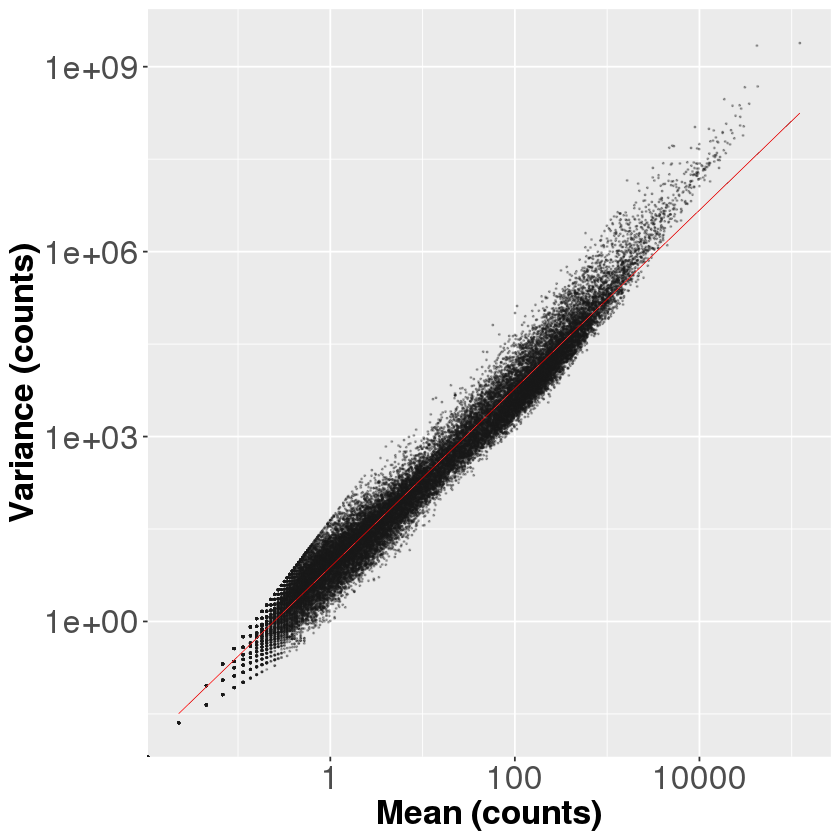

In [15]:
ggplot(df) + geom_point(aes(x=mean_cnts, y=var_cnts), size=.2, alpha=0.3, color="grey10") + 
             geom_smooth(aes(x=mean_cnts, y=var_cnts),method = 'glm', size=.2, color='red', alpha=1) +
             labs(y="Variance (counts)", x="Mean (counts)") +
             scale_y_log10() + scale_x_log10() + 
             theme(axis.text.x = element_text(size = 20), axis.title.x = element_text(size=20, face='bold'),
                   axis.text.y = element_text(size = 20), axis.title.y = element_text(size=20, face='bold'))

In [196]:
cnts %>% head(2)

,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.14,TSPAN6,817,966,789,1226,757,723,991,1400,1194,⋯,1262,2215,1604,2076,1064,2301,175,457,294,584
ENSG00000000005.6,TNMD,19,0,0,11,11,14,1,11,0,⋯,0,2,0,0,0,1,0,0,0,0


Check correlation between replicates

In [197]:
library(repr)
options(repr.plot.width=14, repr.plot.height=10)

In [500]:
cnts_tpm <- read.csv(file = 'data/H2HY7BGXC/rsem_results/rsem_TPM.csv')

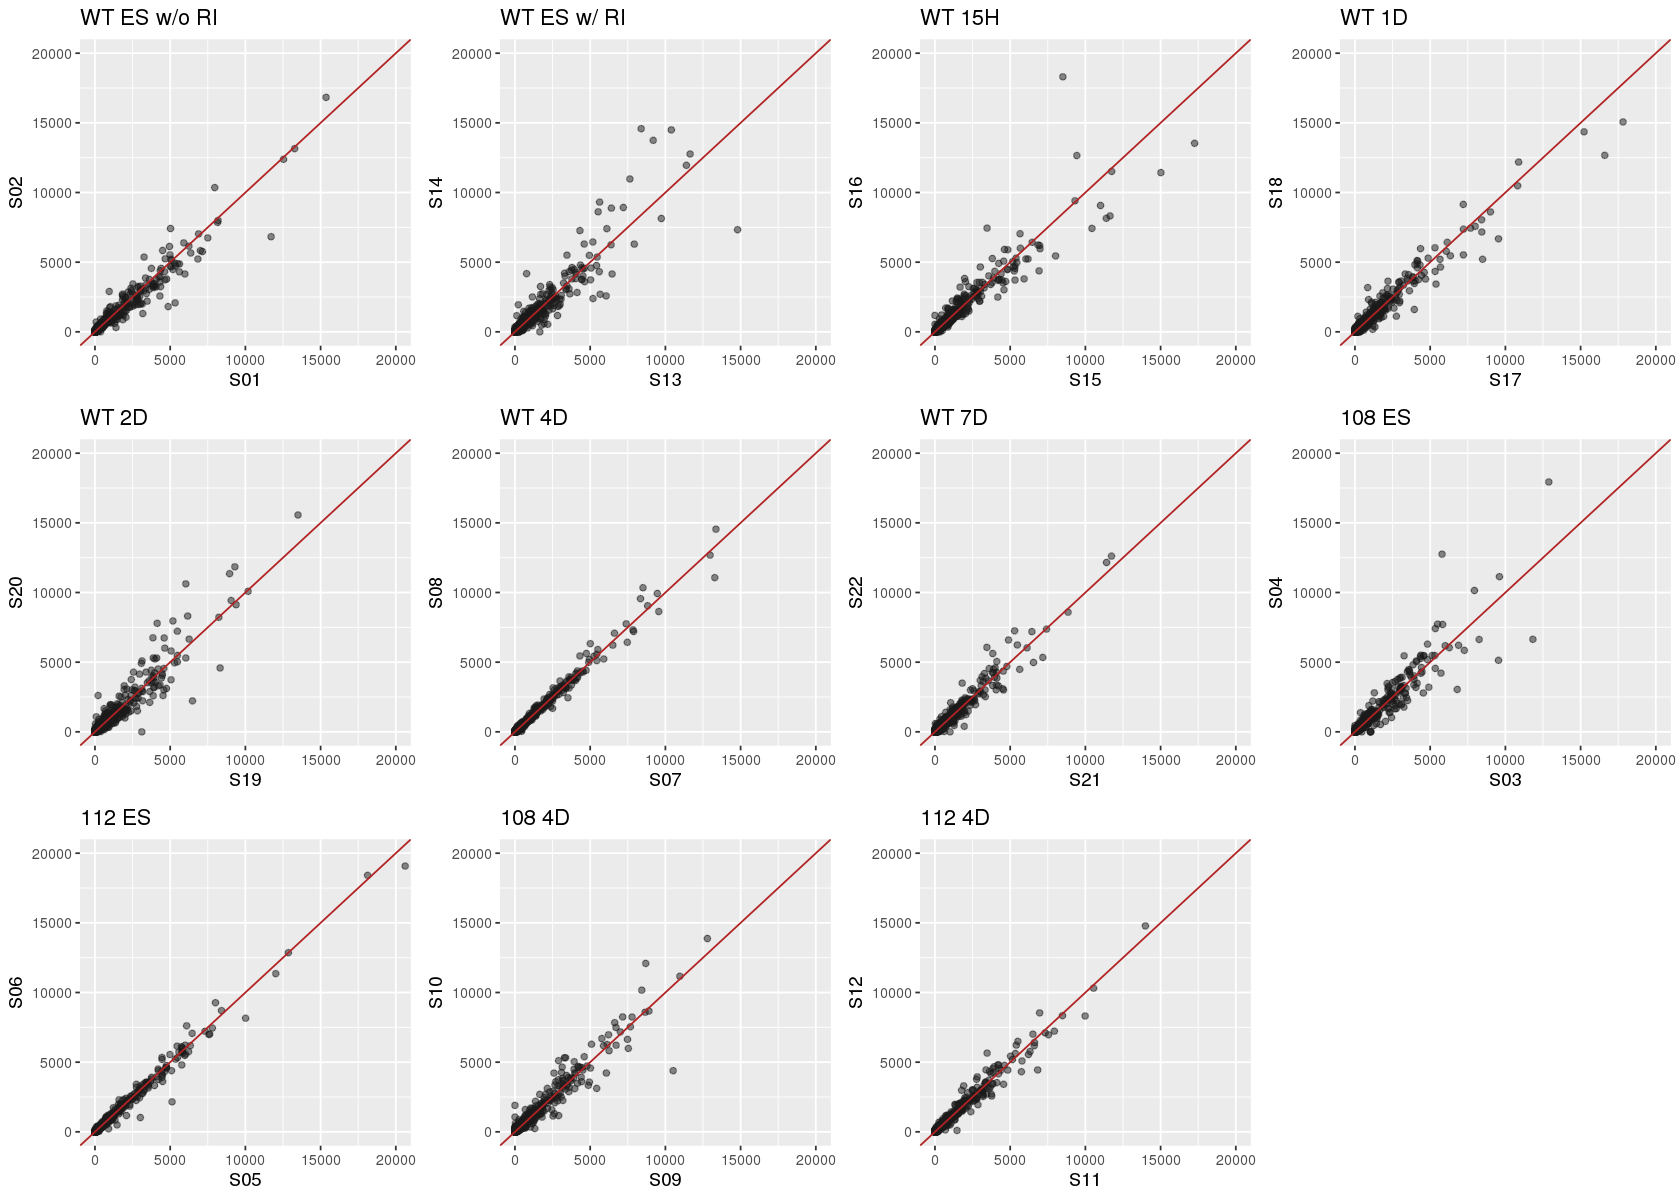

In [503]:
gg <- ggplot(cnts_tpm)
p1 <- gg + geom_point(aes(x=S01, y=S02), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT ES w/o RI")
p2 <- gg + geom_point(aes(x=S13, y=S14), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT ES w/ RI")
p3 <- gg + geom_point(aes(x=S15, y=S16), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT 15H")
p4 <- gg + geom_point(aes(x=S17, y=S18), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT 1D")
p5 <- gg + geom_point(aes(x=S19, y=S20), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT 2D")
p6 <- gg + geom_point(aes(x=S07, y=S08), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT 4D")
p7 <- gg + geom_point(aes(x=S21, y=S22), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "WT 7D")
p8 <- gg + geom_point(aes(x=S03, y=S04), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "108 ES")
p9 <- gg + geom_point(aes(x=S05, y=S06), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "112 ES")
p10 <- gg + geom_point(aes(x=S09, y=S10), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "108 4D")
p11 <- gg + geom_point(aes(x=S11, y=S12), color='grey10', alpha=0.5) + geom_abline(slope = 1, color='firebrick') + coord_cartesian(xlim = c(0,2e04), ylim = c(0,2e04)) + labs(title = "112 4D")


gridExtra::grid.arrange(p1, p2, p3, p4, p5, p6, p7,p8,p9,p10,p11, ncol=4)

# ACT III

**WT with devlopment:**

Condition |Sample
:--------:|:-------:
ES w/o RI  |  1, 2
ES w/ RI |   13, 14
+DOX 15h   | 15, 16
+DOX Day1   | 17, 18
+DOX Day2   | 19, 20
+DOX Day4   | 7, 8
+DOX Day7   | 21, 22

contrasts: ES, 15H, 1D, 2D, 4D, 7D

In [14]:
all.sample.annotation <- read.csv('RNASeqSampleNames.csv', stringsAsFactors=F)

In [15]:
all.sample.annotation %>% head

,sample,condition,group
,<chr>,<chr>,<chr>
1,S01_B1,WT.ES,ES
2,S01_B2,WT.ES,ES
3,S02_B1,WT.ES,ES
4,S02_B2,WT.ES,ES
5,S03_B1,K108.ES,KO.ES
6,S03_B2,K108.ES,KO.ES


In [201]:
# sample names for WT at different time points: 15H , 1D, 2D, 4D, 7D
cols3 <- all.sample.annotation %>% filter(str_detect(sample, 'S01|02|13|14|15|16|17|18|19|20|07|08|21|22.+')) %>% pull(sample)

In [202]:
cols3 %>% t

S01_B1,S01_B2,S02_B1,S02_B2,S07_B1,S07_B2,S08_B1,S08_B2,S13_B1,S13_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2


In [203]:
cnts3<- cnts[,cols3]

In [204]:
getwd()

[1] "/gpfs/commons/groups/sanjana_lab/cdai/TFscreen"

In [205]:
gtf_lookup <- read.csv('gencode_refseq_partial_modified_geneNames_ID_20191230.csv', stringsAsFactors=F, header=T) #gencode gene_id to gene_name lookup

In [227]:
gene_ids3 <- rownames_to_column(cnts3,'gene_id')[,1:2]
#gtf_lookup$gene_id <- as.character(gtf_lookup$gene_id)
gene_names3 <- left_join(gene_ids3, gtf_lookup, 'gene_id') %>% pull(gene_name) %>% as.character

In [230]:
all.sample.annotation %>% str

'data.frame':	44 obs. of  3 variables:
 $ sample   : chr  "S01_B1" "S01_B2" "S02_B1" "S02_B2" ...
 $ condition: chr  "WT.ES" "WT.ES" "WT.ES" "WT.ES" ...
 $ group    : chr  "ES" "ES" "ES" "ES" ...


In [209]:
# label column names
coldata3 <- all.sample.annotation %>% column_to_rownames('sample')
coldata3 <- coldata3[cols3,]

In [210]:
coldata3 %>% t
cnts3 %>% colnames %>% t

,S01_B1,S01_B2,S02_B1,S02_B2,S07_B1,S07_B2,S08_B1,S08_B2,S13_B1,S13_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
condition,WT.ES,WT.ES,WT.ES,WT.ES,WT.D4,WT.D4,WT.D4,WT.D4,WT.ES,WT.ES,⋯,WT.D1,WT.D1,WT.D2,WT.D2,WT.D2,WT.D2,WT.D7,WT.D7,WT.D7,WT.D7
group,ES,ES,ES,ES,D4,D4,D4,D4,ES,ES,⋯,D1,D1,D2,D2,D2,D2,D7,D7,D7,D7


S01_B1,S01_B2,S02_B1,S02_B2,S07_B1,S07_B2,S08_B1,S08_B2,S13_B1,S13_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2


In [231]:
dds3 <- DESeqDataSetFromMatrix(countData = cnts3, colData = coldata3, design = ~ group) 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [232]:
mcols(dds3)["gene_name"] <- gene_names3

In [239]:
all(rownames(dds3) == gene_ids3$gene_id) # make sure all gene_ids are the same as the gene ids in dds

[1] TRUE

In [240]:
keep3 <- rowSums(counts(dds3)) >= 10 # pre-analysis filter to remove very low read count genes
dds3 <- dds3[keep3,]

In [241]:
dim(dds3)

[1] 29522    28

In [262]:
## store RNAseq raw read count
counts(dds3, normalize=F) %>% as.data.frame %>% 
    add_column("gene_name"=mcols(dds3)$gene_name, .before="S01_B1") %>%
    group_by(gene_name) %>% summarise_all(sum) %>%
    write.table("RNAseq_raw_readcount_properGenename.txt", quote = F, sep = "\t", row.names = F, col.names = T)

In [219]:
counts(dds3) %>% head()

,S01_B1,S01_B2,S02_B1,S02_B2,S07_B1,S07_B2,S08_B1,S08_B2,S13_B1,S13_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
ENSG00000000003.14,817,966,789,1226,739,359,998,1247,1228,1891,⋯,1262,2215,1604,2076,1064,2301,175,457,294,584
ENSG00000000005.6,19,0,0,11,0,0,0,1,25,36,⋯,0,2,0,0,0,1,0,0,0,0
ENSG00000000419.12,762,731,746,908,390,235,513,774,770,932,⋯,853,901,797,791,345,1147,378,400,255,567
ENSG00000000457.14,20,67,49,70,138,29,168,43,90,96,⋯,0,58,129,46,82,80,46,31,111,124
ENSG00000000460.17,114,211,160,266,0,14,70,38,136,368,⋯,146,165,114,187,118,126,54,0,0,1
ENSG00000000938.13,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,2,0,0,0,0


In [220]:
dds3 <- DESeq(dds3) # build model

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 576 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [221]:
resultsNames(dds3) # model coefficients

[1] "Intercept"       "group_D2_vs_D1"  "group_D4_vs_D1"  "group_D7_vs_D1" 
[5] "group_ES_vs_D1"  "group_H15_vs_D1"

In [224]:
mcols(dds3)$gene_name

NULL

### Volcano plots

#### 15H vs. WT

In [57]:
res3a <- results(dds3, contrast = c('group','H15','ES')) # modelling ES vs. +DOX

# add gene_name to result
if (all(rownames(res3a) == rownames(dds3))) {
    res3a.df <- cbind(res3a, 'gene_name' = mcols(dds3)$gene_name) %>% as.data.frame %>% rownames_to_column('gene_id') #%>% filter(!is.na(padj))
}  else {
    print("Rownames don't match!")
}

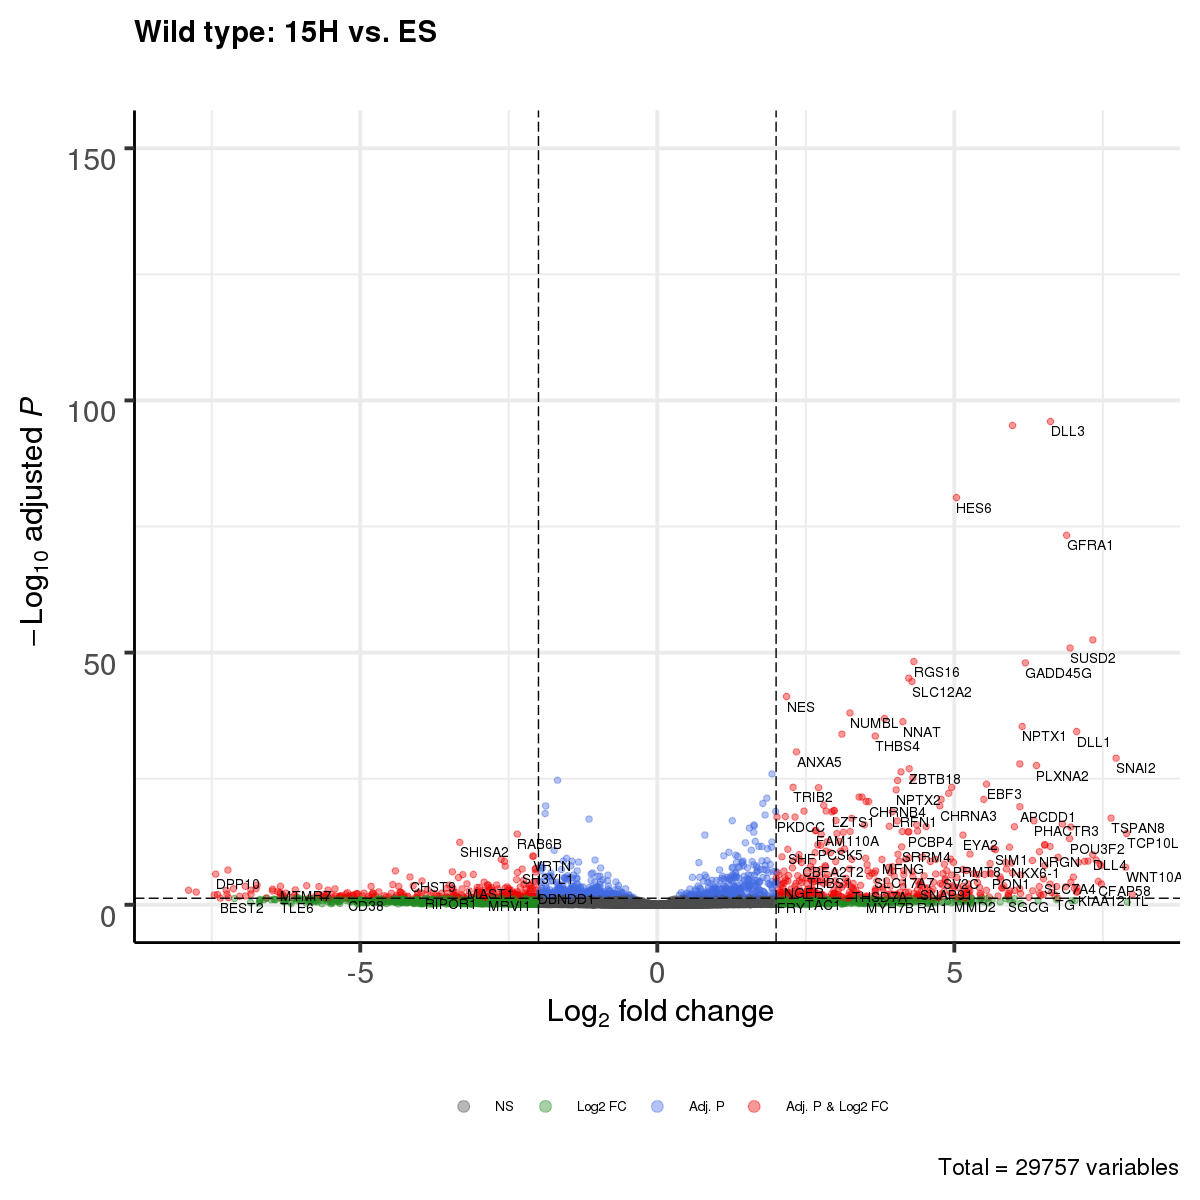

In [60]:
EnhancedVolcano(res3a.df, lab = res3a.df$gene_name, x='log2FoldChange',y='padj', xlim=c(-8,8), ylim=c(0,150),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS','Log2 FC','Adj. P', 'Adj. P & Log2 FC'),legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "Wild type: 15H vs. ES", subtitle="", pCutoff = 0.05, FCcutoff = 2,
                transcriptPointSize = 1.5, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

#### 1D vs. WT

In [61]:
res3b <- results(dds3, contrast = c('group','D1','ES'))

# add gene_name to result
if (all(rownames(res3b) == rownames(dds3))) {
    res3b.df <- cbind(res3b, 'gene_name' = mcols(dds3)$gene_name) %>% as.data.frame %>% rownames_to_column('gene_id')# %>% filter(!is.na(padj))   
}  else {
    print("Rownames don't match!")
}

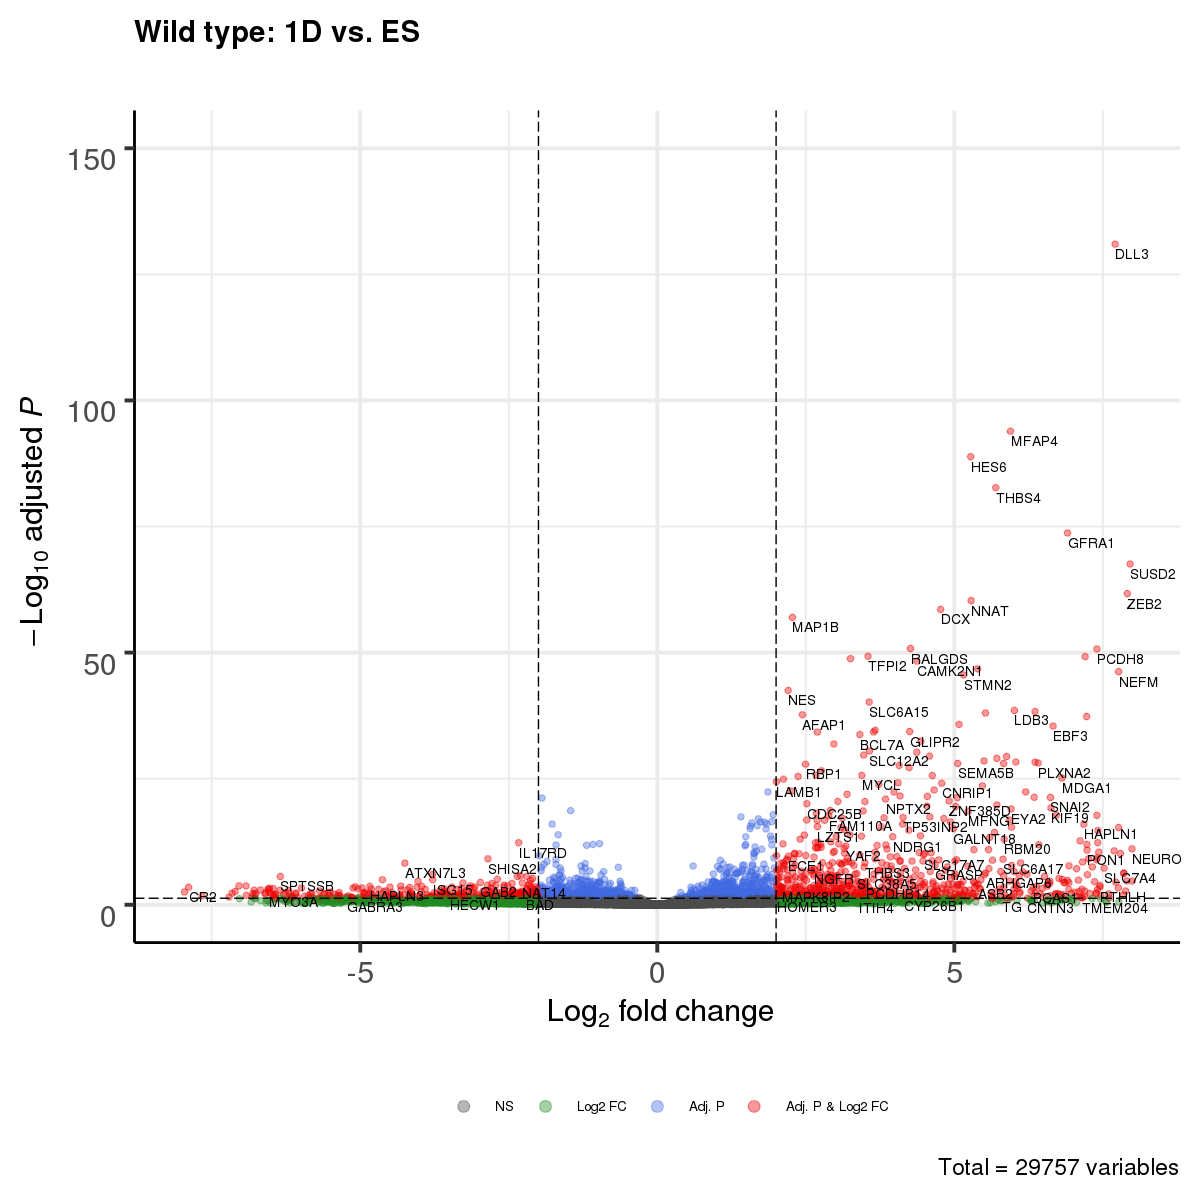

In [62]:
EnhancedVolcano(res3b.df, lab = res3b.df$gene_name, x='log2FoldChange',y='padj', xlim=c(-8,8), ylim=c(0,150),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS','Log2 FC','Adj. P', 'Adj. P & Log2 FC'),legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "Wild type: 1D vs. ES", subtitle="", pCutoff = 0.05, FCcutoff = 2,
                transcriptPointSize = 1.5, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

#### 2D vs. WT

In [63]:
res3c <- results(dds3, contrast = c('group','D2','ES'))

# add gene_name to result
if (all(rownames(res3c) == rownames(dds3))) {
    res3c.df <- cbind(res3c, 'gene_name' = mcols(dds3)$gene_name) %>% as.data.frame %>% rownames_to_column('gene_id') #%>% filter(!is.na(padj))   
}  else {
    print("Rownames don't match!")
}

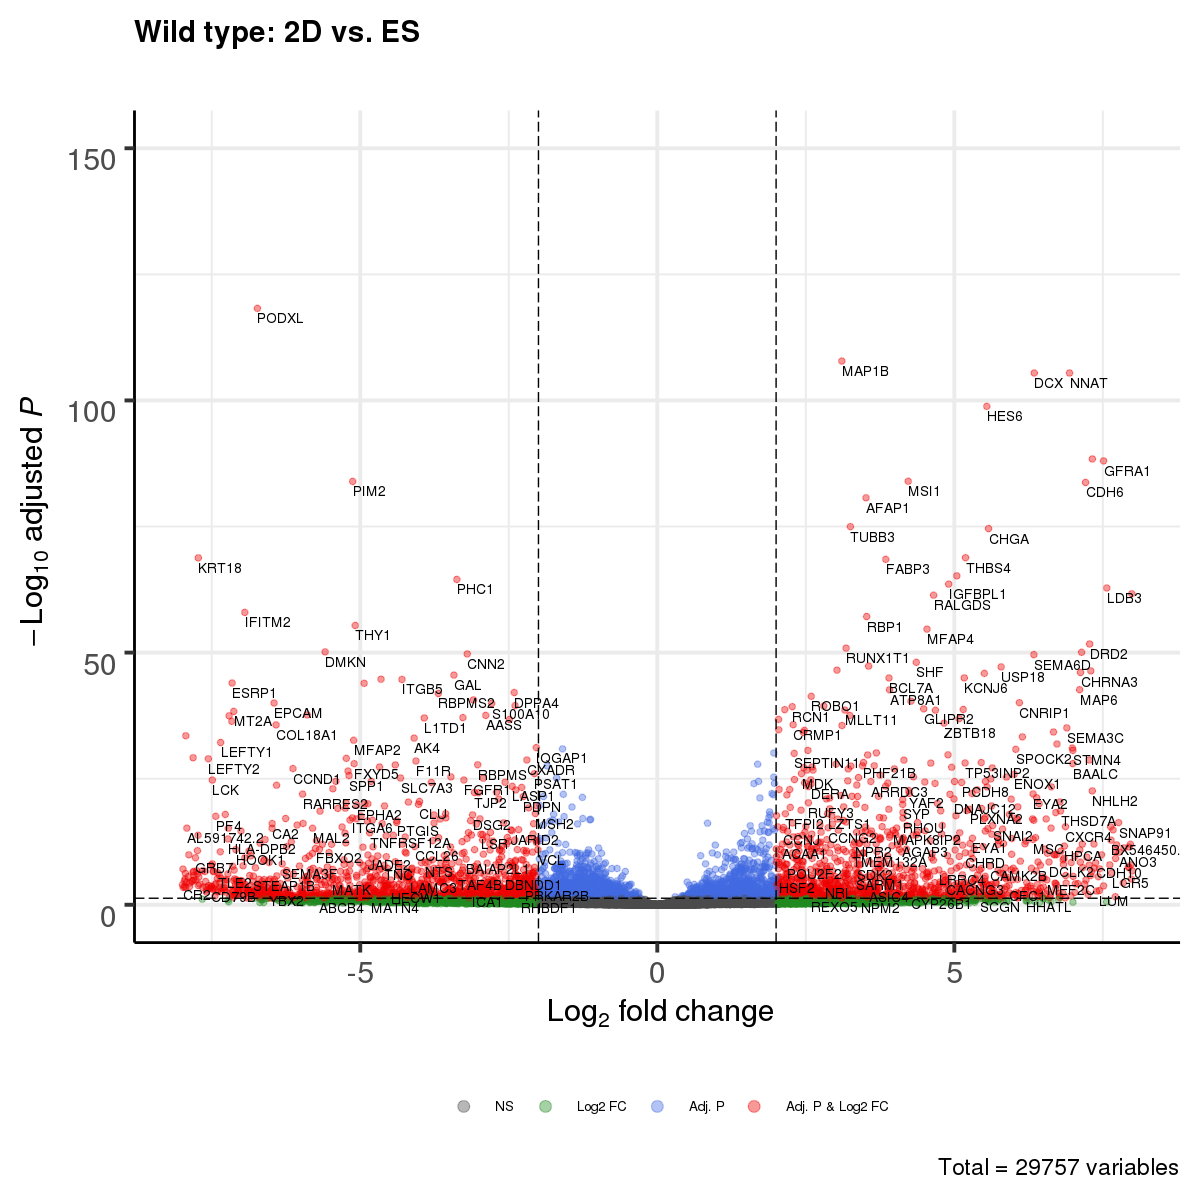

In [64]:
EnhancedVolcano(res3c.df, lab = res3c.df$gene_name, x='log2FoldChange',y='padj', xlim=c(-8,8), ylim=c(0,150),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS','Log2 FC','Adj. P', 'Adj. P & Log2 FC'),legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "Wild type: 2D vs. ES", subtitle="", pCutoff = 0.05, FCcutoff = 2,
                transcriptPointSize = 1.5, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

#### 4D vs. WT

In [65]:
res3d <- results(dds3, contrast = c('group','D4','ES'))

# add gene_name to result
if (all(rownames(res3c) == rownames(dds3))) {
    res3d.df <- cbind(res3d, 'gene_name' = mcols(dds3)$gene_name) %>% as.data.frame %>% rownames_to_column('gene_id')# %>% filter(!is.na(padj))
}  else {
    print("Rownames don't match!")
}

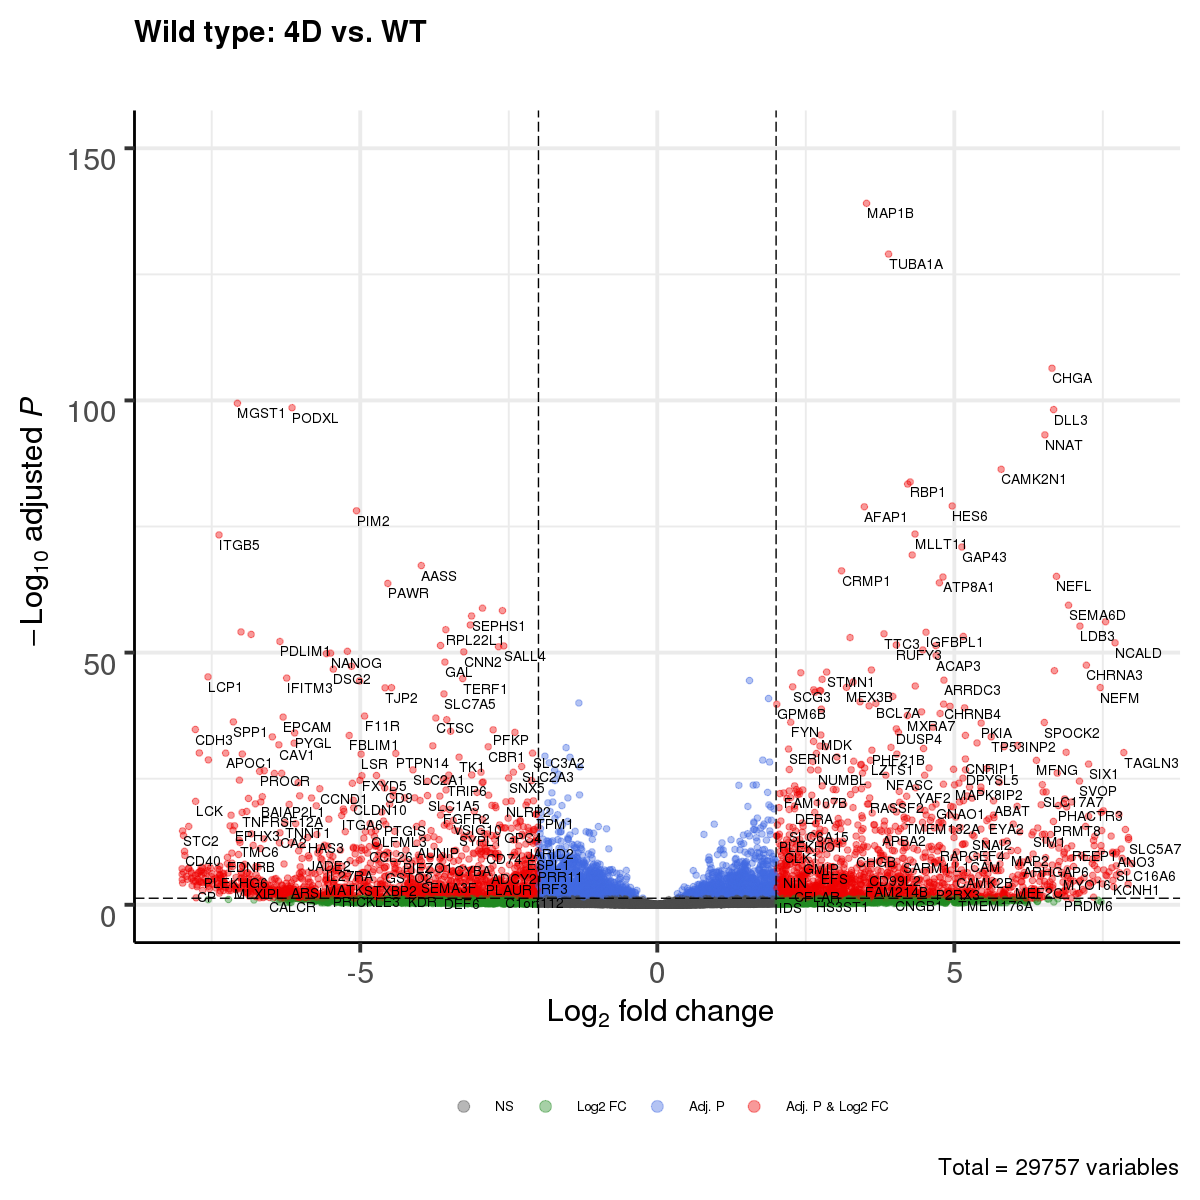

In [66]:
EnhancedVolcano(res3d.df, lab = res3d.df$gene_name, x='log2FoldChange',y='padj', xlim=c(-8,8), ylim=c(0,150),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS','Log2 FC','Adj. P', 'Adj. P & Log2 FC'),legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "Wild type: 4D vs. WT", subtitle="", pCutoff = .05, FCcutoff = 2,
                transcriptPointSize = 1.5, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

#### 7D vs. WT

In [67]:
res3e <- results(dds3, contrast = c('group','D7','ES'))

# add gene_name to result
if (all(rownames(res3c) == rownames(dds3))) {
    res3e.df <- cbind(res3e, 'gene_name' = mcols(dds3)$gene_name) %>% as.data.frame %>% rownames_to_column('gene_id')# %>% filter(!is.na(padj))
}  else {
    print("Rownames don't match!")
}

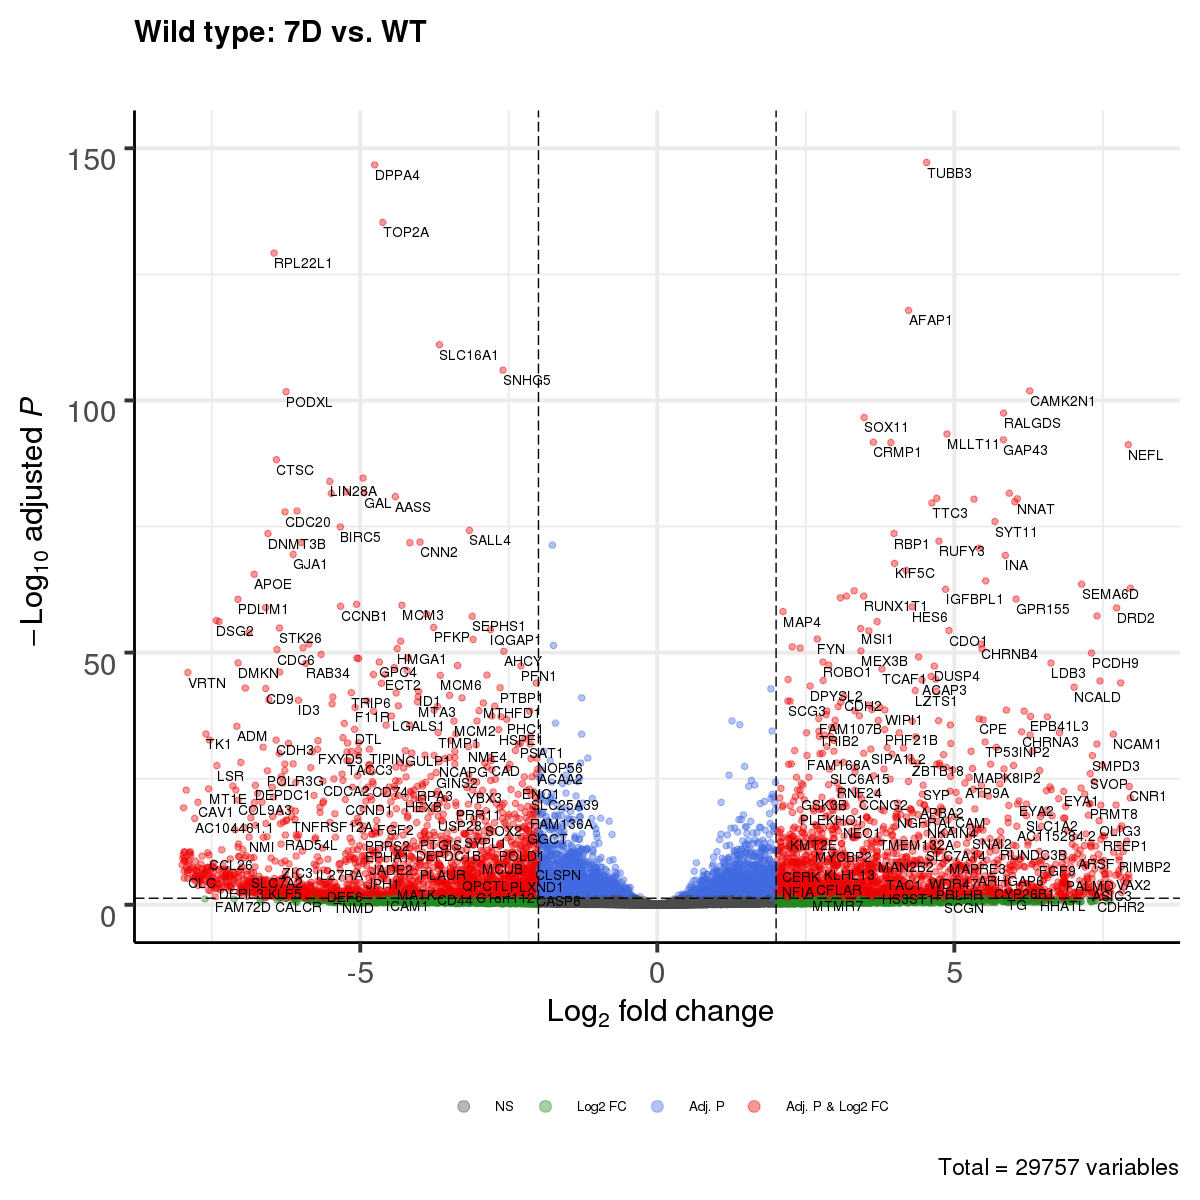

In [68]:
EnhancedVolcano(res3e.df, lab = res3e.df$gene_name, x='log2FoldChange',y='padj', xlim=c(-8,8), ylim=c(0,150),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS','Log2 FC','Adj. P', 'Adj. P & Log2 FC'),legendPosition='bottom', legendLabSize = 8, 
                legendIconSize = 3.0, title = "Wild type: 7D vs. WT", subtitle="", pCutoff = .05, FCcutoff = 2,
                transcriptPointSize = 1.5, transcriptLabSize = 3.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts

## Save RNAseq result to excel

In [77]:
res3a.df %>% head

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003.14,1093.2455416,0.4627771,0.1808703,2.5586131,0.01050906,0.09509573,TSPAN6
ENSG00000000005.6,4.2712569,-0.3569464,2.0413513,-0.1748579,0.86119128,0.96779725,TNMD
ENSG00000000419.12,562.8246277,-0.3726923,0.3059226,-1.2182568,0.22312640,0.57749445,DPM1
ENSG00000000457.14,66.6639588,-0.5357799,0.8261091,-0.6485584,0.51662387,0.82276605,SCYL3
ENSG00000000460.17,134.9026604,0.5850347,0.7719233,0.7578922,0.44851550,0.78084051,C1orf112
ENSG00000000938.13,0.3862281,1.9566390,4.8072454,0.4070188,0.68399422,NA,FGR


In [78]:
all(rownames(counts(dds3)) == res3b.df$gene_id)

[1] TRUE

In [99]:
rawCounts.dds3 <- counts(dds3) %>% as.data.frame %>% 
                        rownames_to_column("gene_id") %>% 
                        add_column("gene_name" = mcols(dds3)$gene_name, .after = "gene_id")

In [103]:
WriteXLS(list("rawCounts" = rawCounts.dds3, "H15_vs_ES"=res3a.df, "D1_vs_ES"=res3b.df, 
              "D2_vs_ES"=res3c.df, "D4_vs_ES"=res3d.df, "D7_vs_ES"=res3e.df), 
         ExcelFileName = "RNA-seq_timepoint_deseq_result_20200102.xlsx")

---

### Get genes at each temporal point

In [42]:
sig_genes_3a <- res3a.df %>% filter(padj < 0.05) %>% pull('gene_name') %>% unique %>% as.character
sig_genes_3b <- res3b.df %>% filter(padj < 0.05) %>% pull('gene_name') %>% unique %>% as.character 
sig_genes_3c <- res3c.df %>% filter(padj < 0.05) %>% pull('gene_name') %>% unique %>% as.character
sig_genes_3d <- res3d.df %>% filter(padj < 0.05) %>% pull('gene_name') %>% unique %>% as.character
sig_genes_3e <- res3e.df %>% filter(padj < 0.05) %>% pull('gene_name') %>% unique %>% as.character

In [58]:
res3a.df %>% head

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003.14,1093.245542,0.4627771,0.1808703,2.5586131,0.01050906,0.09509573,TSPAN6
ENSG00000000005.6,4.271257,-0.3569464,2.0413513,-0.1748579,0.86119128,0.96779725,TNMD
ENSG00000000419.12,562.824628,-0.3726923,0.3059226,-1.2182568,0.22312640,0.57749445,DPM1
ENSG00000000457.14,66.663959,-0.5357799,0.8261091,-0.6485584,0.51662387,0.82276605,SCYL3
ENSG00000000460.17,134.902660,0.5850347,0.7719233,0.7578922,0.44851550,0.78084051,C1orf112
ENSG00000001036.13,229.696054,-0.3709913,0.2918562,-1.2711442,0.20367734,0.55177809,FUCA2


In [51]:
res3d.df %>% filter(gene_name == "")

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000000003.14,1093.245542,-0.288727888,0.1821825,-1.584828204,1.130054e-01,2.449508e-01,TSPAN6
ENSG00000000005.6,4.271257,-4.840391754,2.2687624,-2.133494380,3.288419e-02,9.466350e-02,TNMD
ENSG00000000419.12,562.824628,-0.342435543,0.3066212,-1.116803383,2.640784e-01,4.475508e-01,DPM1
ENSG00000000457.14,66.663959,1.040519310,0.8217471,1.266228097,2.054314e-01,3.764262e-01,SCYL3
ENSG00000000460.17,134.902660,-2.560694236,0.7853514,-3.260571418,1.111880e-03,5.325775e-03,C1orf112
ENSG00000001036.13,229.696054,-0.917270981,0.2959860,-3.099035546,1.941517e-03,8.680077e-03,FUCA2
ENSG00000001084.13,137.522627,-2.168504237,0.6974215,-3.109316439,1.875208e-03,8.413318e-03,GCLC
ENSG00000001167.14,250.558936,0.037566454,0.3633911,0.103377472,9.176634e-01,9.634188e-01,NFYA
ENSG00000001460.18,17.693780,-1.133635002,1.0904978,-1.039557365,2.985456e-01,4.860089e-01,STPG1


##### Number of genes significant in each tempral profile

In [59]:
res3e.df %>% filter(gene_name == 'ZBTB18')

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000179456.10,589.1484,4.285333,0.3701805,11.57633,5.432022e-31,3.330038e-29,ZBTB18


In [60]:
counts(dds3, normalized=T) %>% head # as.data.frame %>% rownames_to_column('gene_id') %>% filter(gene_id == 'ENSG00000036549') %>% t

,S01_B1,S01_B2,S02_B1,S02_B2,S07_B1,S07_B2,S08_B1,S08_B2,S13_B1,S13_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
ENSG00000000003.14,846.03819,959.80522,786.16613,974.820005,769.0147,1011.54403,761.22781,909.9837700,1030.83022,1304.61965,⋯,1439.6191,1500.169820,1470.2864,1742.4498,1018.75088,1500.0899106,281.56756,528.86655,410.6753,483.2358297
ENSG00000000005.6,19.67531,0.00000,0.00000,8.746346,0.0000,0.00000,0.00000,0.7297384,20.98596,24.83676,⋯,0.0000,1.354555,0.0000,0.0000,0.00000,0.6519296,0.00000,0.00000,0.0000,0.0000000
ENSG00000000419.12,789.08335,726.31223,743.32058,721.971096,405.8400,662.15278,391.29245,564.8175124,646.36748,642.99604,⋯,973.0547,610.227092,730.5600,663.9103,330.32806,747.7632019,608.18594,462.90289,356.1980,469.1690332
ENSG00000000457.14,20.71085,66.57034,48.82401,55.658565,143.6049,81.71247,128.14256,31.3787507,75.54945,66.23135,⋯,0.0000,39.282099,118.2462,38.6092,78.51276,52.1543646,74.01205,35.87497,155.0509,102.6048679
ENSG00000000460.17,118.05184,209.64690,159.42533,211.502546,0.0000,39.44740,53.39273,27.7300587,114.16361,253.88685,⋯,166.5486,111.750799,104.4967,156.9548,112.98177,82.1431242,86.88371,0.00000,0.0000,0.8274586
ENSG00000000938.13,0.00000,0.00000,0.00000,0.000000,0.0000,0.00000,0.00000,0.0000000,0.00000,0.00000,⋯,0.0000,0.000000,0.0000,0.0000,0.00000,1.3038591,0.00000,0.00000,0.0000,0.0000000


In [48]:
sig_genes_3a %>% length
sig_genes_3b %>% length
sig_genes_3c %>% length
sig_genes_3d %>% length
sig_genes_3e %>% length

[1] 1545

[1] 2257

[1] 4834

[1] 6094

[1] 8208

##### Build a matrix that shows how significant genes show up at different time point.

 .|15H |1D|2D|4D|7D
:--:|:--:|:--:|:--:|:--:|:--:
Gene1|log2FC|log2FC|log2FC|log2FC|log2FC
Gene2| |log2FC|log2FC|log2FC|log2FC
...
GeneN| | | |log2FC|log2FC



In [49]:
length(c(1,1,1,1,1)==5) & is.numeric(c(1,1,1,1,1))

[1] TRUE

In [50]:
# A function to convert a vector of 5 binary numbers (represented in integer) into an integer. 
# This esentially represents/flags gene expression time profile.
# e.g. c(1,1,1,1,1) => 31, c(0,0,1,0,0) => 8
bit.like.to.int <- function(c) { 
    if (length(c) == 5 & is.numeric(c)){
        return(c[1]*2^4 + c[2]*2^3 + c[3]*2^2 + c[4]*2^1 + c[5]*2^0)
    }
    else {
        print("Vector must be numeric with a length of 5!")
    }
}

# DESeq2 results from each time point, combined into a list
res.all.times <- list(res3a.df, res3b.df, res3c.df, res3d.df, res3e.df) 

# first get all significant gene_ids from all 5 time point
sig.geneID.all.times <- c()
fdr.cutoff <- 0.05
for (df in res.all.times) { # iterate through the results from all 5 time points
    geneID.temp <- df %>% filter(padj < fdr.cutoff) %>% pull(gene_id) %>% as.character # get gene_ids of significant genes from results of all 5 time points
    sig.geneID.all.times <- c(sig.geneID.all.times, geneID.temp) # a list of gene ids for all the genes that are significant at any time point
}
sig.geneID.all.times <- unique(sig.geneID.all.times) # remove duplicates gene_ids

# create a expression table with Log2FC at all 5 time points. The rows are genes that are significant at any timepoint. 
# Value of NA means the gene is not significant at the given time point

#make a df of gene_id
expr.tbl <- sig.geneID.all.times %>% as.data.frame(stringsAsFactors=F) %>% rename('.'='gene_id')

#create a list of log2FC for all the genes listed in expr.tbl at each time point
FC.all.times <- c()
for (df in res.all.times) {
    x <- expr.tbl %>% 
            left_join(df[df$padj < fdr.cutoff, c('gene_id', 'log2FoldChange')], c('gene_id')) %>% 
            select(log2FoldChange) %>% 
            pull(log2FoldChange)
    FC.all.times <- c(FC.all.times, list(x)) # log2FC for the gene_id
}

#add log2FC at each time point as a column, then left join gtf_lookup to add gene name
expr.tbl <- expr.tbl %>% 
                add_column('15H' = FC.all.times[[1]]) %>% 
                add_column('1D' = FC.all.times[[2]]) %>%
                add_column('2D' = FC.all.times[[3]]) %>%
                add_column('4D' = FC.all.times[[4]]) %>%
                add_column('7D' = FC.all.times[[5]]) %>%
                left_join(gtf_lookup, 'gene_id')


# create a logic matrix where 1: this gene is significant at this time point, and 0: not
logic.matrix <- apply(expr.tbl[,c(2:6)], MARGIN = 2, function(x) {!is.na(x)}) %>% as.data.frame %>% 
        mutate_all(funs(as.integer))

# expression time profile flag. e.g. a number of 7 represents this gene is activated from D2 through D7, while 1 means only activated on D7
expr.flags <- c()
for (i in 1:dim(logic.matrix)[1]) {
    x <- logic.matrix[i,] %>% as.numeric # convert each row e.g.[1,0,0,0,0] into a numeric vector of 5 elements, eg.c(1,0,0,0,0)
    x <- bit.like.to.int(x) # calculate bit value (represented in int, eg. 00100 = 8)
    expr.flags <- c(expr.flags, x)
}

expr.tbl <- cbind(expr.tbl, expr.flag=expr.flags) # add expression flags 
expr.tbl <- expr.tbl[,c(1,7:8,2:6)]

Warning message:
“funs() is soft deprecated as of dplyr 0.8.0
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once per session.”

In [61]:
expr.tbl %>% head
expr.tbl %>% dim

gene_id,gene_name,expr.flag,15H,1D,2D,4D,7D
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001630.17,CYP51A1,25,1.7327958,1.2488794,NA,NA,1.602056
ENSG00000002586.20,CD99,30,1.2853105,0.9205293,1.142094,0.9041245,NA
ENSG00000002586.20_PAR_Y,CD99,30,1.2853105,0.9205293,1.142094,0.9041245,NA
ENSG00000002834.18,LASP1,31,-0.9969169,-1.0071639,-2.442639,-1.9664839,-1.526428
ENSG00000003249.13,DBNDD1,28,-2.0081057,-2.1703805,-2.555920,NA,NA
ENSG00000003987.14,MTMR7,17,-6.3424635,NA,NA,NA,2.609631


[1] 10438     8

In [340]:
#TF list
tflist <- read.csv('TFlist.csv', stringsAsFactors = F, col.names='gene_name') %>% pull(var = gene_name)

In [516]:
correct_tf_gene_name <- read.csv('Refseq_to_Gencode_genenames.csv', header = F, stringsAsFactors = F) %>% rename('V1'='HGNC', 'V2'='Gencode')

In [517]:
correct_tf_gene_name %>% head

HGNC,Gencode
<chr>,<chr>
AES,TLES
ANKRD32,SLF1
CCRN4L,NOCT
CNOT2,AC092881.1
CRAMP1L,CRAMP1
FAIM3,FCMR


In [546]:
correct_tf_gene_name

HGNC,Gencode
<chr>,<chr>
AES,TLES
ANKRD32,SLF1
CCRN4L,NOCT
CNOT2,AC092881.1
CRAMP1L,CRAMP1
FAIM3,FCMR
HDGFRP2,HDGFL2
HKR1,ZNF875
MKL1,MRTFA


In [559]:
gtf_lookup %>% filter(gene_id == 'ENSG00000198039.11')

gene_name,gene_id
<fct>,<chr>
AC092161.1,ENSG00000198039.11


In [549]:
correct_tf_gene_name %>% filter(HGNC == 'ZZZ3') %>% pull(Gencode)

[1] "AC118549.1"

In [555]:
tflist[1988]

[1] "AC118549.1"

In [558]:
which(tflist == 'AC092161.1')

[1] 1754 1773

In [552]:
correct_tf_gene_name$Gencode[1]

[1] "TLES"

In [554]:
for (tf in tflist) {
    if (tf %in% correct_tf_gene_name$HGNC) {
        new_name <- correct_tf_gene_name %>% filter(HGNC == tf) %>% pull(Gencode)
        tflist[which(tflist == tf)] <- new_name
    }
}

In [518]:
tflist %>% head

[1] "AATF"  "ABL1"  "ABT1"  "ABTB1" "ADNP"  "AEBP1"

In [373]:
#120 hit list
hitlist <- read.csv('HS_td-VStd+_td-VSdox120.csv', header = F, stringsAsFactors = F) %>% pull

In [375]:
hitlist %>% t

PHOX2A,TAF1L,TFEB,VAX2,SNAI2,ELK3,ISL2,ZBTB43,ZNF200,MLLT6,⋯,ZBTB18,CHD5,CTNNB1,ZNF554,UBE2K,HTATIP2,NEUROG3,SMAD3,LHX4,PRDM6


In [382]:
expr.tbl <- expr.tbl %>% mutate(isTF=if_else(gene_name %in% tflist, 'Yes', 'No')) %>% 
             mutate(isHIT=if_else(gene_name %in% hitlist, 'Yes', 'No'))

In [384]:
expr.tbl %>% write.csv('FoldChangeByTimePoints.csv', row.names=F)

##### genes that are significant from 15H to 7D

In [202]:
sig_genes_3a %>% intersect(sig_genes_3b) %>% intersect(sig_genes_3c) %>% intersect(sig_genes_3d) %>%
                 intersect(sig_genes_3e) %>% length

[1] 569

##### genes that become significant at Day 1 and continues to be significant at Day 2, Day 4 and Day 7

In [203]:
sig_genes_3b %>% setdiff(sig_genes_3a) %>% intersect(sig_genes_3c) %>% 
            intersect(sig_genes_3d) %>% intersect(sig_genes_3e) %>% length

[1] 614

##### genes that become significant at Day 2 and continues to be significant at Day 4 and Day 7

In [204]:
sig_genes_3c %>% setdiff(unique(c(sig_genes_3a,sig_genes_3b))) %>% intersect(sig_genes_3d) %>% intersect(sig_genes_3e) %>% length

[1] 1914

##### genes that become significant at Day 4 and continues to be significant at Day 7

In [65]:
sig_genes_3e %>% setdiff(unique(c(sig_genes_3a,sig_genes_3b, sig_genes_3c))) %>% intersect(sig_genes_3e) %>% length

[1] 4077

##### genes that are only significant at Day 7

In [206]:
sig_genes_3e %>% setdiff(unique(c(sig_genes_3a,sig_genes_3b, sig_genes_3c, sig_genes_3d))) %>% length

[1] 2476

## Zoom in on ~2000 screened TF

In [62]:
#TF list
tflist <- read.csv('TFlist.csv', stringsAsFactors = F, col.names='gene_name') %>% pull(var = gene_name)

In [63]:
tflist[1:5]
length(tflist)

[1] "AATF"  "ABL1"  "ABT1"  "ABTB1" "ADNP"

[1] 1988

#### Result for each temporal stage
`gene`,`padj`,`log2FoldChange` for each temporal point (15H - 7D) for the 1988 TF genes.

Selection criteria:
- `padj` is not na
- `gene_name` in `tflist`

In [66]:
res3a.df %>% tail

,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18120,ENSG00000288045.1,9.768058,0.5958140,2.0763235,0.2869562,0.7741458,0.9393474,AL352979.4
18121,ENSG00000288066.1,80.563443,-0.1454350,0.4936024,-0.2946399,0.7682690,0.9383642,AC097448.1
18122,ENSG00000288075.1,16.420657,-1.3728041,1.2551803,-1.0937107,0.2740819,0.6329130,AC108519.1
18123,ENSG00000288095.1,4.705590,-0.6852218,2.0164201,-0.3398210,0.7339914,0.9277397,AC005618.4
18124,ENSG00000288096.1,9.268497,0.5706050,0.9108247,0.6264708,0.5310062,0.8300004,AC109322.2
18125,ENSG00000288105.1,4.461664,1.0135426,0.9510271,1.0657347,0.2865436,0.6464270,AC117461.1


In [67]:
# get DGE result, namely FC and padj, for each temproal point
res3a_tf <- res3a.df %>% filter((gene_name %in% tflist) & (!is.na(padj))) %>% select(gene_name, gene_id, padj, log2FoldChange)
res3b_tf <- res3b.df %>% filter((gene_name %in% tflist) & (!is.na(padj))) %>% select(gene_name, gene_id, padj, log2FoldChange)
res3c_tf <- res3c.df %>% filter((gene_name %in% tflist) & (!is.na(padj))) %>% select(gene_name, gene_id, padj, log2FoldChange)
res3d_tf <- res3d.df %>% filter((gene_name %in% tflist) & (!is.na(padj))) %>% select(gene_name, gene_id, padj, log2FoldChange)
res3e_tf <- res3e.df %>% filter((gene_name %in% tflist) & (!is.na(padj))) %>% select(gene_name, gene_id, padj, log2FoldChange)

In [68]:
# Determine and annotate whether a TF screen listed gene is up or down regulated
fdr = 0.05
FC.threshold = 2

In [69]:
res3a_tf <- res3a_tf %>% mutate(DGE=case_when(padj < fdr & log2FoldChange > FC.threshold ~ 'Up', 
                                  padj < fdr & log2FoldChange < -FC.threshold ~ 'Down',
                                  padj < fdr & log2FoldChange >= -FC.threshold & log2FoldChange <= FC.threshold ~ 'No Change',
                                  padj >= fdr ~ 'No Change')) 
res3b_tf <- res3b_tf %>% mutate(DGE=case_when(padj < fdr & log2FoldChange > FC.threshold ~ 'Up', 
                                  padj < fdr & log2FoldChange < -FC.threshold ~ 'Down',
                                  padj < fdr & log2FoldChange >= -FC.threshold & log2FoldChange <= FC.threshold ~ 'No Change',
                                  padj >= fdr ~ 'No Change')) 
res3c_tf <- res3c_tf %>% mutate(DGE=case_when(padj < fdr & log2FoldChange > FC.threshold ~ 'Up', 
                                  padj < fdr & log2FoldChange < -FC.threshold ~ 'Down',
                                  padj < fdr & log2FoldChange >= -FC.threshold & log2FoldChange <= FC.threshold ~ 'No Change',
                                  padj >= fdr ~ 'No Change')) 
res3d_tf <- res3d_tf %>% mutate(DGE=case_when(padj < fdr & log2FoldChange > FC.threshold ~ 'Up', 
                                  padj < fdr & log2FoldChange < -FC.threshold ~ 'Down',
                                  padj < fdr & log2FoldChange >= -FC.threshold & log2FoldChange <= FC.threshold ~ 'No Change',
                                  padj >= fdr ~ 'No Change')) 
res3e_tf <- res3e_tf %>% mutate(DGE=case_when(padj < fdr & log2FoldChange > FC.threshold ~ 'Up', 
                                  padj < fdr & log2FoldChange < -FC.threshold ~ 'Down',
                                  padj < fdr & log2FoldChange >= -FC.threshold & log2FoldChange <= FC.threshold ~ 'No Change',
                                  padj >= fdr ~ 'No Change')) 

In [70]:
#Export to csv
res3a_tf %>% write.csv('TF_Screen_FC_Pval_15HvsES.csv', quote=F)
res3b_tf %>% write.csv('TF_Screen_FC_Pval_1DvsES.csv', quote=F)
res3c_tf %>% write.csv('TF_Screen_FC_Pval_2DvsES.csv', quote=F)
res3d_tf %>% write.csv('TF_Screen_FC_Pval_4DvsES.csv', quote=F)
res3e_tf %>% write.csv('TF_Screen_FC_Pval_7DvsES.csv', quote=F)

In [71]:
res3a_tf %>% head

gene_name,gene_id,padj,log2FoldChange,DGE
<chr>,<chr>,<dbl>,<dbl>,<chr>
NFYA,ENSG00000001167.14,0.7646300,0.2890018,No Change
ARX,ENSG00000004848.8,0.4434275,2.8463614,No Change
UPF1,ENSG00000005007.12,0.9279808,0.1094467,No Change
POLR2J,ENSG00000005075.15,0.7763057,-0.2314939,No Change
CREBBP,ENSG00000005339.14,0.1641984,0.7450358,No Change
SOX8,ENSG00000005513.10,0.9123444,-0.6652200,No Change


##### Summary plot for TF screen selected genes that are up/down regulated

In [72]:
# summarize gene counts for TF screen selected genes
c <- c()
for (l in list(res3a_tf, res3b_tf, res3c_tf, res3d_tf, res3e_tf)) {
    gcount <- l %>% group_by(DGE) %>% summarize( "gene_count"=n()) %>% pull(gene_count) # get the count of genes
    c <- c(c,gcount)
}

tfs.bar.data <- data.frame(matrix(c, nrow=3))

colnames(tfs.bar.data) = c('15H', '1D', '2D', '4D','7D')
rownames(tfs.bar.data) = c('Down', 'No Change', 'Up')

tfs.bar.data <- tfs.bar.data %>% gather(condition, gene_counts) %>% add_column(DGE=rep(c('Down', 'No Change', 'Up'),5), .before=2)

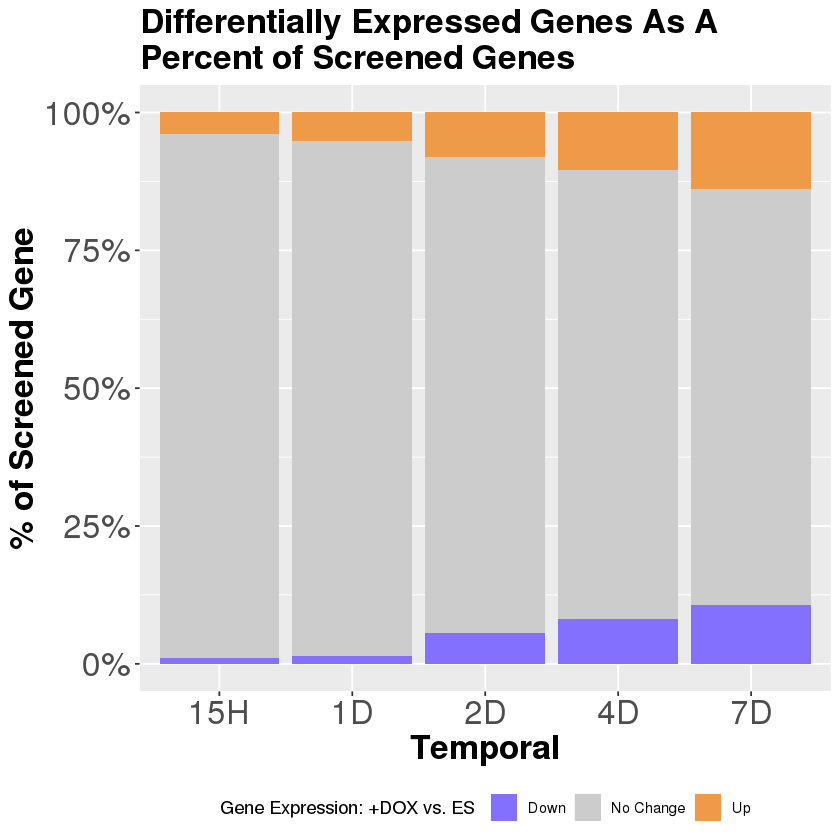

In [73]:
ggplot(data = tfs.bar.data) + geom_bar(aes(x=condition, y=gene_counts, fill=DGE),position=position_fill(reverse = TRUE), stat="identity") +
            labs(y="% of Screened Gene", x="Temporal", title = "Differentially Expressed Genes As A \nPercent of Screened Genes") +
            scale_fill_manual(name='Gene Expression: +DOX vs. ES', values=c('lightslateblue', 'grey80', 'tan2')) +
            theme(axis.text = element_text(size = 20), axis.title=element_text(size=20, face='bold'), legend.position = "bottom", 
                  plot.title = element_text(size = 20, face = 'bold')) +
            scale_y_continuous(labels = scales::percent)

##### Normalized counts of all TF screen genes, and plot heatmap

In [74]:
cnts3_tf <- (counts(dds3, normalized=T) + 1e-06) %>% as.data.frame %>% rownames_to_column('gene_id') %>%
            inner_join(gtf_lookup, 'gene_id') %>% inner_join(data.frame(gene_name=tflist), 'gene_name')

Warning message:
“Column `gene_name` joining character vector and factor, coercing into character vector”

In [75]:
cnts3_tf %>% head

gene_id,S01_B1,S01_B2,S02_B1,S02_B2,S07_B1,S07_B2,S08_B1,S08_B2,S13_B1,⋯,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2,gene_name
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000001167.14,173.971134,235.480163,144.479202,197.190345,172.742140,256.408098,170.856745,276.570850,334.096439,⋯,199.1196070,241.9922804,146.043479,298.731463,206.009741,474.642467,292.786077,185.781685,126.601169,NFYA
ENSG00000004848.8,0.000001,0.000001,0.000001,0.000001,0.000001,5.635344,37.374914,4.378431,0.000001,⋯,0.6772786,0.9166384,4.196653,24.894290,7.823156,14.480619,0.000001,0.000001,13.239339,ARX
ENSG00000005007.12,211.250662,199.711025,163.410959,222.634260,234.138442,59.171100,228.063244,156.893754,195.589122,⋯,187.6058882,232.8259062,146.043479,229.793433,211.877107,32.179151,158.544240,176.003701,142.322882,UPF1
ENSG00000005075.15,836.718306,511.697400,573.931171,539.092956,653.506405,555.081266,478.246332,464.843354,511.217918,⋯,254.6563678,420.7365777,506.955523,540.972040,516.328210,672.544241,299.729621,342.229418,359.117039,POLR2J
ENSG00000005102.13,0.000001,15.897396,0.000001,2.385368,0.000001,0.000001,6.864781,2.189216,0.000001,⋯,0.6772786,0.0000010,0.000001,1.914946,0.000001,8.044789,0.000001,0.000001,5.792211,MEOX1
ENSG00000005339.14,135.656063,203.685373,107.612095,244.102563,368.377815,242.319741,241.792803,206.515965,395.375434,⋯,361.6662241,435.4027764,315.588207,295.859045,294.020231,397.412507,337.919109,424.643850,399.662511,CREBBP


In [76]:
cnts3_tf <- cnts3_tf[,c(1,30,2:5, 10:13, 14:29)]

In [77]:
# this particular gene has two gene IDs with different expressing profile.
cnts3_tf[,1:2] %>% group_by(gene_name) %>% summarise(n_geneIDs=n_distinct(gene_id)) %>% filter(n_geneIDs > 1)
cnts3_tf %>% filter(gene_name == 'MATR3')

gene_name,n_geneIDs
<chr>,<int>
MATR3,2


gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S13_B1,S13_B2,S14_B1,S14_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000015479.18,MATR3,2880.87911,3573.933095,3662.79684,3849.98243,2997.63412,3721.37409,3385.736183,3309.575300,⋯,2819.919509,3649.171555,3274.228872,3694.732131,3775.314601,3821.611064,5476.89137,5739.99581,4654.32008,5189.820418
ENSG00000280987.4,MATR3,69.38135,0.000001,13.94972,43.73173,45.32967,15.17802,0.000001,0.000001,⋯,0.000001,0.000001,0.000001,3.357322,0.000001,9.127015,30.57019,15.04434,13.96855,9.102046


In [78]:
cnts3_tf <- filter(cnts3_tf, gene_id != 'ENSG00000280987.4') # remove one gene_id from genes with multiple gene_ids

In [79]:
cnts3_tf %>% write.csv('TF_ScreenSelectedNormalizedCounts.csv',row.names=F, quote=F)

In [80]:
cnts3_tf %>% head

gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S13_B1,S13_B2,S14_B1,S14_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001167.14,NFYA,173.971134,235.480163,144.479202,197.190345,334.096439,222.1509939,205.399097,191.788168,⋯,281.763803,199.1196070,241.9922804,146.043479,298.731463,206.009741,474.642467,292.786077,185.781685,126.601169
ENSG00000004848.8,ARX,0.000001,0.000001,0.000001,0.000001,0.000001,0.0000010,0.000001,2.107563,⋯,0.000001,0.6772786,0.9166384,4.196653,24.894290,7.823156,14.480619,0.000001,0.000001,13.239339
ENSG00000005007.12,UPF1,211.250662,199.711025,163.410959,222.634260,195.589122,290.4520756,299.168249,226.914206,⋯,227.008084,187.6058882,232.8259062,146.043479,229.793433,211.877107,32.179151,158.544240,176.003701,142.322882
ENSG00000005075.15,POLR2J,836.718306,511.697400,573.931171,539.092956,511.217918,342.1953193,485.590255,408.164562,⋯,630.831509,254.6563678,420.7365777,506.955523,540.972040,516.328210,672.544241,299.729621,342.229418,359.117039
ENSG00000005102.13,MEOX1,0.000001,15.897396,0.000001,2.385368,0.000001,0.6899109,0.000001,0.000001,⋯,1.140745,0.6772786,0.0000010,0.000001,1.914946,0.000001,8.044789,0.000001,0.000001,5.792211
ENSG00000005339.14,CREBBP,135.656063,203.685373,107.612095,244.102563,395.375434,383.5899143,152.933023,374.443566,⋯,159.704180,361.6662241,435.4027764,315.588207,295.859045,294.020231,397.412507,337.919109,424.643850,399.662511


In [81]:
ano3 <- as.data.frame(colData(dds3)[,c('condition','group')])

In [82]:
quadroot <- function (x) { # function to help decrease range of read counts. Easier for heatmap visulization
    return(x^(1/4))
}

In [83]:
ano3 <- as.data.frame(colData(dds3)[,c('condition','group')]) #annotation for heatmap

In [84]:
cnts3_tf %>% head

gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S13_B1,S13_B2,S14_B1,S14_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001167.14,NFYA,173.971134,235.480163,144.479202,197.190345,334.096439,222.1509939,205.399097,191.788168,⋯,281.763803,199.1196070,241.9922804,146.043479,298.731463,206.009741,474.642467,292.786077,185.781685,126.601169
ENSG00000004848.8,ARX,0.000001,0.000001,0.000001,0.000001,0.000001,0.0000010,0.000001,2.107563,⋯,0.000001,0.6772786,0.9166384,4.196653,24.894290,7.823156,14.480619,0.000001,0.000001,13.239339
ENSG00000005007.12,UPF1,211.250662,199.711025,163.410959,222.634260,195.589122,290.4520756,299.168249,226.914206,⋯,227.008084,187.6058882,232.8259062,146.043479,229.793433,211.877107,32.179151,158.544240,176.003701,142.322882
ENSG00000005075.15,POLR2J,836.718306,511.697400,573.931171,539.092956,511.217918,342.1953193,485.590255,408.164562,⋯,630.831509,254.6563678,420.7365777,506.955523,540.972040,516.328210,672.544241,299.729621,342.229418,359.117039
ENSG00000005102.13,MEOX1,0.000001,15.897396,0.000001,2.385368,0.000001,0.6899109,0.000001,0.000001,⋯,1.140745,0.6772786,0.0000010,0.000001,1.914946,0.000001,8.044789,0.000001,0.000001,5.792211
ENSG00000005339.14,CREBBP,135.656063,203.685373,107.612095,244.102563,395.375434,383.5899143,152.933023,374.443566,⋯,159.704180,361.6662241,435.4027764,315.588207,295.859045,294.020231,397.412507,337.919109,424.643850,399.662511


##### Plot heatmaps of TF screened genes that are sigificant and pass FC threshold

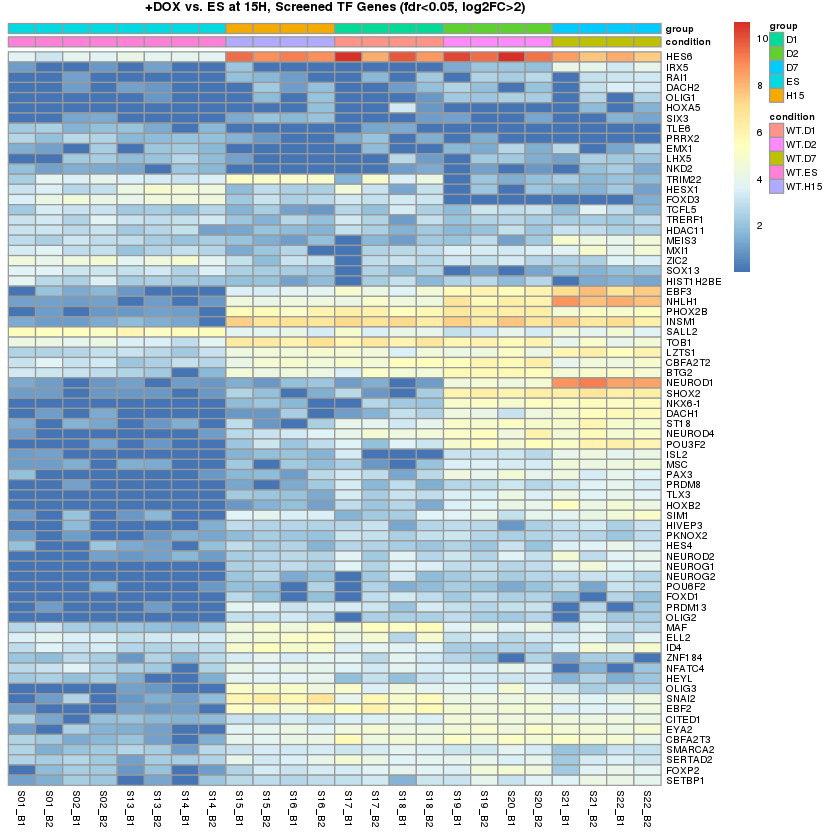

In [85]:
tf.heatmap.genes.3a <- res3a_tf %>% filter(DGE != 'No Change' & padj < fdr & abs(log2FoldChange) > abs(FC.threshold)) %>% pull(gene_name) %>% as.character
cnts3_tf[,c(2:26)] %>% filter(gene_name %in% tf.heatmap.genes.3a) %>% column_to_rownames('gene_name') %>% as.matrix %>% apply(2, quadroot) %>%
                pheatmap(cluster_rows = T, show_rownames = T, cluster_cols = F, annotation = ano3, fontsize=6, treeheight_row=0,
                main = paste0('+DOX vs. ES at 15H, Screened TF Genes (fdr<',fdr,', log2FC>',FC.threshold,')'))

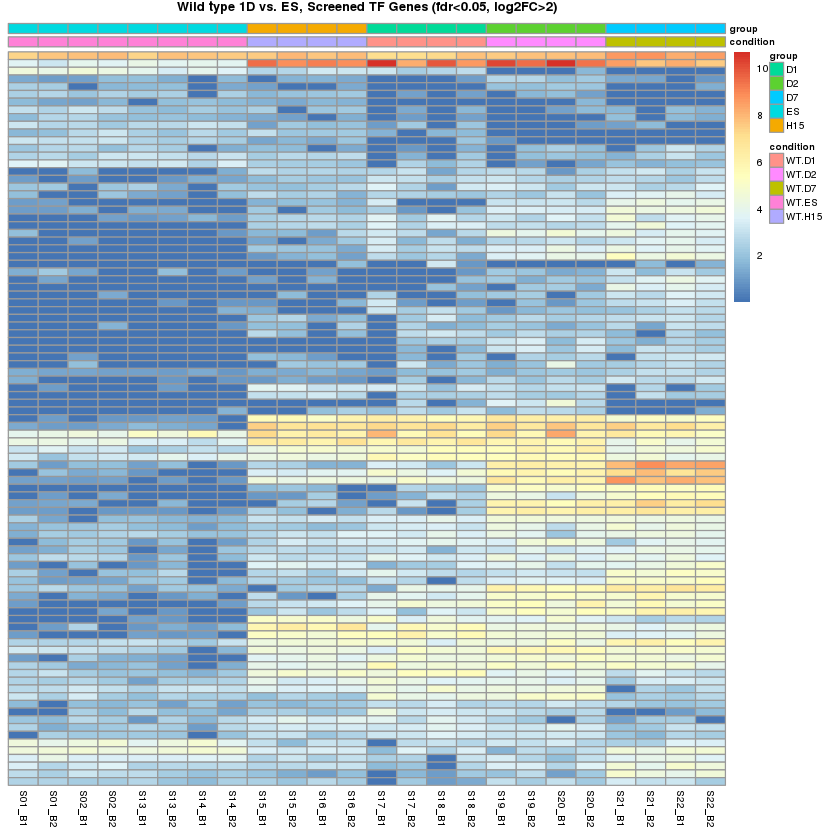

In [86]:
tf.heatmap.genes.3b <- res3b_tf %>% filter(DGE != 'No Change' & padj < fdr & abs(log2FoldChange) > abs(FC.threshold)) %>% pull(gene_name) %>% as.character
cnts3_tf[,c(2:26)] %>% filter(gene_name %in% tf.heatmap.genes.3b) %>% column_to_rownames('gene_name') %>% as.matrix %>% apply(2, quadroot) %>%
                pheatmap(cluster_rows = T, show_rownames = F, cluster_cols = F, annotation = ano3, fontsize=6, treeheight_row=0,
                main = paste0('Wild type 1D vs. ES, Screened TF Genes (fdr<',fdr,', log2FC>',FC.threshold,')'))

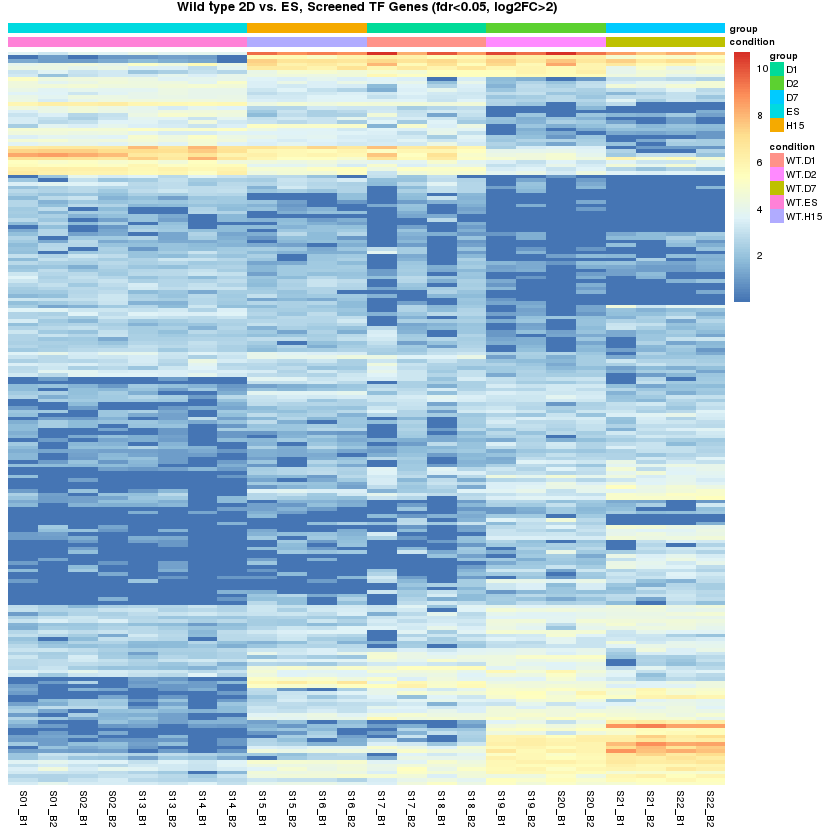

In [87]:
tf.heatmap.genes.3c <- res3c_tf %>% filter(DGE != 'No Change' & padj < fdr & abs(log2FoldChange) > abs(FC.threshold)) %>% pull(gene_name) %>% as.character
cnts3_tf[,c(2:26)] %>% filter(gene_name %in% tf.heatmap.genes.3c) %>% column_to_rownames('gene_name') %>% as.matrix %>% apply(2, quadroot) %>%
                pheatmap(cluster_rows = T, show_rownames = F, cluster_cols = F, annotation = ano3, fontsize=6, treeheight_row=0,
                main = paste0('Wild type 2D vs. ES, Screened TF Genes (fdr<',fdr,', log2FC>',FC.threshold,')'))

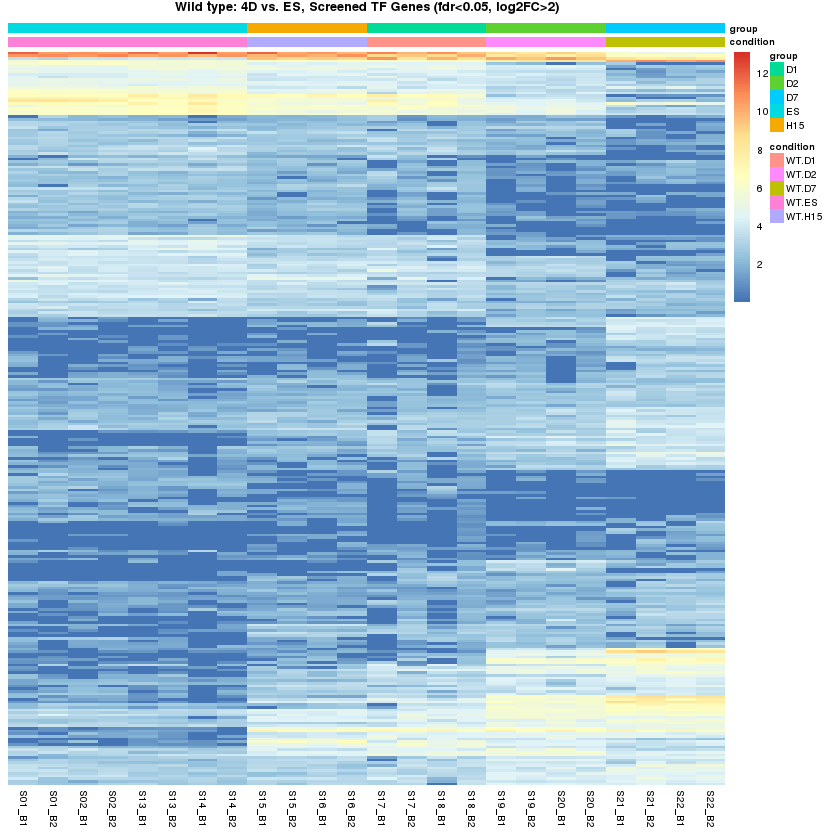

In [88]:
tf.heatmap.genes.3d <- res3d_tf %>% filter(DGE != 'No Change' & padj < fdr & abs(log2FoldChange) > abs(FC.threshold)) %>% pull(gene_name) %>% as.character
cnts3_tf[,c(2:26)] %>% filter(gene_name %in% tf.heatmap.genes.3d) %>% column_to_rownames('gene_name') %>% as.matrix %>% apply(2, quadroot) %>%
                pheatmap(cluster_rows = T, show_rownames = F, cluster_cols = F, annotation = ano3, fontsize=6, treeheight_row=0,
                main = paste0('Wild type: 4D vs. ES, Screened TF Genes (fdr<',fdr,', log2FC>',FC.threshold,')'))

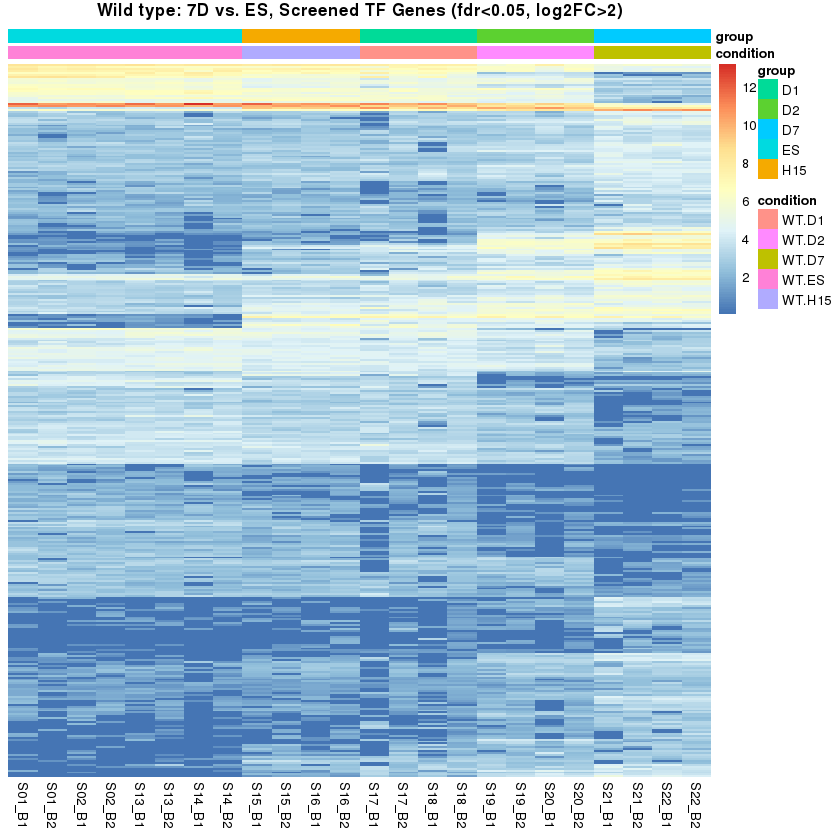

In [89]:
tf.heatmap.genes.3e <- res3e_tf %>% filter(DGE != 'No Change' & padj < fdr & abs(log2FoldChange) > abs(FC.threshold)) %>% pull(gene_name) %>% as.character
cnts3_tf[,c(2:26)] %>% filter(gene_name %in% tf.heatmap.genes.3e) %>% column_to_rownames('gene_name') %>% as.matrix %>% apply(2, quadroot) %>%
                pheatmap(cluster_rows = T, show_rownames = F, cluster_cols = F, annotation = ano3, fontsize=8, treeheight_row=0,
                main = paste0('Wild type: 7D vs. ES, Screened TF Genes (fdr<',fdr,', log2FC>',FC.threshold,')'))

In [90]:
for (x in list(tf.heatmap.genes.3a, tf.heatmap.genes.3b, tf.heatmap.genes.3c, tf.heatmap.genes.3d, tf.heatmap.genes.3e)) {
    print(length(x))
}

[1] 72
[1] 95
[1] 203
[1] 277
[1] 368


In [91]:
tf.heatmap.genes.3a %>% sort %>% paste(" ", collapse="") # 15H up or down regulated

[1] "BTG2  CBFA2T2  CBFA2T3  CITED1  DACH1  DACH2  EBF2  EBF3  ELL2  EMX1  EYA2  FOXD1  FOXD3  FOXP2  HDAC11  HES4  HES6  HESX1  HEYL  HIST1H2BE  HIVEP3  HOXA5  HOXB2  ID4  INSM1  IRX5  ISL2  LHX5  LZTS1  MAF  MEIS3  MSC  MXI1  NEUROD1  NEUROD2  NEUROD4  NEUROG1  NEUROG2  NFATC4  NHLH1  NKD2  NKX6-1  OLIG1  OLIG2  OLIG3  PAX3  PHOX2B  PKNOX2  POU3F2  POU6F2  PRDM13  PRDM8  PRRX2  RAI1  SALL2  SERTAD2  SETBP1  SHOX2  SIM1  SIX3  SMARCA2  SNAI2  SOX13  ST18  TCFL5  TLE6  TLX3  TOB1  TRERF1  TRIM22  ZIC2  ZNF184  "

In [92]:
tf.heatmap.genes.3b %>% sort %>% paste(" ", collapse="") # 1D up or down regulated

[1] "AFF3  BACH2  BARX1  BRF1  BTG2  CBFA2T2  CBFA2T3  CITED1  DACH1  DENND4A  E2F1  EBF2  EBF3  ESRRA  ETV4  EYA2  FOXD1  FOXP2  GATA6  GBX2  HABP4  HES2  HES4  HES6  HIVEP3  HOXA5  HOXB2  IFI16  INSM1  INSM2  IRX2  ISL1  ISL2  LHX9  LMO1  LMO3  LZTS1  MAF  MATR3  MEIS1  MEIS3  MSC  NEUROD2  NEUROD4  NEUROG1  NEUROG2  NHLH1  NHLH2  NKX6-1  NR4A1  NR4A2  NRL  OLIG2  OLIG3  ONECUT2  OVOL2  PAX3  PDLIM4  PER3  PHOX2B  PKNOX2  POU3F2  POU6F2  PRDM13  PRDM8  RAI1  RARG  RCOR2  RELB  RXRG  SCRT2  SERTAD2  SETBP1  SHOX2  SIM1  SIX4  SMARCA2  SNAI2  SOX13  ST18  STAT5A  TBC1D2B  TCF12  TLE2  TLX2  TLX3  TOB1  TSHZ1  VAX2  YAF2  ZBTB10  ZHX3  ZIC2  ZNF184  ZNF491  "

In [93]:
tf.heatmap.genes.3c %>% sort %>% paste(" ", collapse="") # 2D up or down regulated

[1] "AFF3  AHR  ANKRD53  ARX  BACH2  BCL11A  BCL11B  BCL6B  BTG2  CALCOCO1  CBFA2T2  CBFA2T3  CDX4  CHD7  CITED1  CRABP2  CREB5  DACH1  DACH2  DENND4A  DMRTA1  E2F1  E2F2  EBF2  EBF3  ELAVL2  ELF3  ELF4  EPAS1  ERF  ESRRA  ESRRG  ETV4  EYA2  FHL2  FOS  FOSL1  FOXA2  FOXA3  FOXD1  FOXD3  FOXH1  FOXP2  GATA6  GLI1  GLI2  HES1  HES2  HES4  HES6  HESX1  HEY1  HEYL  HIF3A  HIST2H2BE  HIVEP2  HIVEP3  HOXB2  HSF2  ID3  INSM1  INSM2  IRF6  IRX2  IRX5  ISL1  ISL2  JARID2  JDP2  KLF12  KLF13  KLF4  LDB2  LHX1  LHX9  LMO1  LZTS1  MAF  MEF2C  MEIS1  MSC  MXD3  MYC  MYT1  NANOG  NEUROD1  NEUROD2  NEUROD4  NEUROG1  NEUROG2  NFKBIZ  NHLH1  NHLH2  NKX6-1  NOTCH3  NPM2  NR4A1  NR5A2  NRIP1  NRL  OLIG1  OLIG2  OLIG3  ONECUT2  OVOL1  OVOL2  PAWR  PAX3  PAX5  PBXIP1  PDLIM1  PDLIM4  PEG3  PER3  PHF21B  PHOX2A  PHOX2B  PKNOX2  POU2F2  POU3F2  POU5F1  POU6F2  PRDM13  PRDM2  PRDM8  PROX1  PRRX2  PTRF  PYGO1  RAI1  RARG  RCOR2  RUNX1T1  RXRG  SALL2  SATB2  SCML1  SCRT1  SCRT2  SERTAD2  SETBP1  SHOX2  SIM1  SIRT2  SIX1  SMARCA2  SNAI2  SOX10  SOX13  SOX15  SOX2  SOX21  SOX3  SOX5  SOX7  SP110  SP140  SPIB  SSBP2  ST18  STAT5A  STAT6  TAF4B  TBC1D2B  TCF12  TCF15  TEAD4  TFE3  TGFB1I1  TLE2  TLE6  TLX2  TLX3  TOB1  TRIB3  TRIM22  TRIM25  TSC22D3  TSHZ1  TSHZ2  UTF1  VAX2  VENTX  YAF2  YBX2  ZBTB10  ZBTB20  ZBTB22  ZBTB3  ZFP36  ZFP57  ZHX3  ZIC3  ZNF114  ZNF165  ZNF222  ZNF398  ZNF483  ZNF486  ZNF491  ZNF589  ZNF596  ZNF688  "

In [94]:
tf.heatmap.genes.3d %>% sort %>% paste(" ", collapse="") # 4D up or down regulated

[1] "AEBP1  AFF3  AHR  APBB1  AR  ARX  ASB8  ASB9  ATF3  BACH2  BCL11A  BCL11B  BCL6B  BTG2  CALCOCO1  CASZ1  CBFA2T2  CBFA2T3  CBX8  CDX4  CEBPB  CHAF1A  CHD7  CITED1  CRABP2  CREB3L1  CREG1  CSDC2  DACH1  DACH2  DDX54  DENND4A  DIP2C  DMRTA1  EBF2  EBF3  ELAVL2  ELF3  ELF4  ELK1  ERF  ESPL1  ESRRA  ESRRG  ETS1  ETV4  EYA2  FHL2  FOS  FOSL1  FOXA2  FOXA3  FOXB1  FOXD1  FOXD3  FOXF1  FOXH1  FOXP2  FOXP4  GATA6  GLI1  GLI2  HDAC10  HDAC4  HDAC9  HES4  HES6  HESX1  HEY1  HEY2  HEYL  HIF3A  HIST1H1C  HIST1H1D  HIST1H2BJ  HIST2H2BE  HIVEP3  HMGA1  HOXB2  HSF2  HTATIP2  ID3  ING4  INSM1  INSM2  IRF3  IRF6  IRX1  IRX3  IRX5  ISL1  ISL2  JARID2  JDP2  JUNB  KLF12  KLF13  KLF15  KLF4  KLF5  KLF9  LDB2  LHX2  LHX4  LHX9  LMO1  LZTR1  LZTS1  MAF  MAML3  MCM3  MCM5  MEF2C  MEIS1  MEIS2  MLLT6  MLXIPL  MSC  MTA3  MXD4  MYB  MYT1  MYT1L  NANOG  NEUROD1  NEUROD2  NEUROD4  NEUROG1  NEUROG2  NFKBIZ  NHLH1  NHLH2  NKX6-1  NKX6-2  NMI  NOTCH3  NPAS3  NPM1  NPM2  NR1H3  NR2F1  NR4A1  NR5A2  NRIP1  OLIG1  OLIG2  OLIG3  ONECUT2  OVOL1  OVOL2  PAWR  PAX3  PAX6  PBX4  PDLIM1  PER3  PHF13  PHF19  PHF21B  PHOX2A  PHOX2B  PIR  PITX2  PKNOX2  POLR1B  POLR2J2  POU3F2  POU3F3  POU4F1  POU4F2  POU5F1  PPAN  PRDM13  PRDM2  PRDM6  PRDM8  PROX1  PRRX2  PTRF  PYGO1  RAI1  RARG  RELB  REST  RORA  RUNX1T1  RXRG  SALL2  SALL4  SATB1  SATB2  SCRT1  SCRT2  SEC14L2  SETBP1  SHOX2  SIM1  SIRT2  SIX1  SIX3  SMAD9  SNAI2  SNAI3  SOX11  SOX13  SOX15  SOX2  SOX21  SOX3  SOX5  SOX7  SP110  SP140  SPIB  SSBP2  ST18  STAT5A  STAT6  TAF4B  TBX3  TCF12  TCF15  TCF7L1  TEAD4  TLE2  TLE6  TLX1  TLX2  TLX3  TOX  TRIM22  TRIM25  TRIM5  TRIP13  TRIP6  TSC22D3  TSHZ1  TSHZ2  TSHZ3  TULP4  UTF1  VAX2  VENTX  WDHD1  WWTR1  YAF2  YBX2  ZBTB10  ZBTB20  ZBTB7B  ZFP2  ZFP36L2  ZFP42  ZFP57  ZHX1  ZHX3  ZIC3  ZNF165  ZNF25  ZNF250  ZNF256  ZNF398  ZNF436  ZNF441  ZNF446  ZNF491  ZNF546  ZNF568  ZNF589  ZNF595  ZNF596  ZNF599  ZNF611  ZNF624  ZNF641  ZNF688  ZNF709  "

In [95]:
tf.heatmap.genes.3e %>% sort %>% paste(" ", collapse="") # 7D up or down regulated

[1] "AEBP1  AFF1  AFF3  AHR  ANKRD32  APBB1  APC  AR  ARNT2  ASB8  ASB9  ATF5  BACH2  BARX1  BAZ2B  BCL6B  BRCA2  BRIP1  BTG2  CALCOCO1  CBFA2T2  CBFA2T3  CBX4  CBX8  CDX4  CEBPB  CHAF1A  CHD7  CITED1  CRABP2  CREB5  CREG1  CRTC1  CTDSPL  DAB2  DACH1  DACH2  DAXX  DBP  DDIT3  DDX54  DENND4A  DIP2C  DNMT1  DPF3  E2F3  E2F8  EBF2  EBF3  ELAVL2  ELF3  ELF4  ENO1  ESPL1  ESRRA  ESRRG  ETS1  ETV4  EYA2  FHL2  FOSL1  FOXA2  FOXA3  FOXD1  FOXD3  FOXF2  FOXH1  FOXM1  FOXP2  GATA3  GLI1  GLI2  GLI3  GTF2I  HABP4  HDAC1  HDAC4  HDAC9  HES1  HES4  HES6  HESX1  HEY1  HEY2  HIC2  HIST1H1B  HIST1H1C  HIST1H1D  HIST1H2BD  HIST1H2BE  HIST1H2BH  HIST1H2BJ  HIST2H2BE  HIVEP3  HMGA1  HMGA2  HMGN3  HOXA5  HOXB2  HOXB3  HOXD9  HTATIP2  ID1  ID3  ID4  ING4  INSM1  INSM2  IRF6  IRX1  IRX3  IRX5  ISL1  ISL2  JDP2  JUN  KLF11  KLF12  KLF13  KLF15  KLF4  KLF5  KLF7  LDB2  LHX2  LHX4  LHX9  LIMD1  LMO1  LZTS1  MAFB  MAFK  MAML3  MCM2  MCM3  MCM4  MCM5  MCM6  MEF2B  MEF2C  MEIS1  MEIS2  MEIS3  MLLT6  MLXIPL  MSC  MTA3  MXD1  MXD4  MXI1  MYB  MYBBP1A  MYBL2  MYEF2  MYT1  MYT1L  NANOG  NCOA1  NCOA6  NEUROD1  NEUROD2  NEUROD4  NEUROG1  NEUROG2  NFATC4  NFIA  NFKBIZ  NFXL1  NHLH1  NHLH2  NKX6-1  NKX6-2  NME2  NMI  NOTCH2  NOTCH3  NPAS3  NPM1  NPM2  NR1H2  NR1H3  NR2F1  NR2F2  NR4A1  NR4A2  NR4A3  NR5A2  NRIP1  OLIG1  OLIG2  OLIG3  ONECUT2  OVOL1  OVOL2  PAWR  PAX3  PAX5  PBX4  PDLIM1  PHF19  PHF2  PHF21B  PHOX2A  PHOX2B  PIR  PKNOX2  PLAGL1  POLR3K  POU2F2  POU3F2  POU3F3  POU4F1  POU4F2  POU5F1  POU6F2  PPAN  PRDM13  PRDM2  PRDM4  PRDM6  PRDM8  PROX1  PRRX2  PTRF  PTTG1  PYGO1  RAD51  RAD54B  RAI1  RARG  RBL1  RELB  REST  RFX3  RORA  RREB1  RUNX1T1  RXRG  SALL4  SATB2  SCRT1  SCRT2  SEC14L2  SETBP1  SHOX2  SIM1  SIM2  SIRT2  SIX1  SIX5  SMAD1  SMAD3  SMAD6  SMAD7  SMAD9  SMARCC2  SNAI2  SNRPB  SOX10  SOX11  SOX13  SOX15  SOX2  SOX21  SOX3  SOX5  SOX6  SOX7  SP110  SP140  SPIB  SS18L1  SSBP2  ST18  STAT6  TAF4B  TBX3  TCF19  TCF7L1  TCF7L2  TEAD4  TFCP2L1  TFE3  TGIF2  THRA  TLE1  TLE2  TLE6  TLX1  TLX3  TRIM22  TRIM25  TRIM28  TRIM5  TRIP13  TRIP4  TRIP6  TSC22D1  TSC22D3  TSHZ1  TSHZ2  TTF2  TULP4  UTF1  VAX2  WDHD1  WWTR1  XRCC3  YAF2  ZBTB10  ZBTB20  ZBTB22  ZBTB3  ZBTB7B  ZFP2  ZFP28  ZFP30  ZFP36  ZFP36L1  ZFP36L2  ZFP37  ZFP42  ZFP57  ZFP90  ZHX1  ZHX3  ZIC3  ZKSCAN1  ZNF10  ZNF117  ZNF160  ZNF165  ZNF25  ZNF250  ZNF300  ZNF333  ZNF34  ZNF341  ZNF358  ZNF382  ZNF41  ZNF436  ZNF440  ZNF441  ZNF45  ZNF471  ZNF483  ZNF491  ZNF513  ZNF540  ZNF546  ZNF556  ZNF558  ZNF568  ZNF570  ZNF583  ZNF589  ZNF596  ZNF606  ZNF624  ZNF627  ZNF641  ZNF646  ZNF653  ZNF688  ZNF695  ZNF709  ZNF83  "

---

In [96]:
expr.tbl

gene_id,gene_name,expr.flag,15H,1D,2D,4D,7D
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000001630.17,CYP51A1,25,1.7327958,1.2488794,NA,NA,1.6020563
ENSG00000002586.20,CD99,30,1.2853105,0.9205293,1.1420945,0.9041245,NA
ENSG00000002586.20_PAR_Y,CD99,30,1.2853105,0.9205293,1.1420945,0.9041245,NA
ENSG00000002834.18,LASP1,31,-0.9969169,-1.0071639,-2.4426395,-1.9664839,-1.5264284
ENSG00000003249.13,DBNDD1,28,-2.0081057,-2.1703805,-2.5559195,NA,NA
ENSG00000003987.14,MTMR7,17,-6.3424635,NA,NA,NA,2.6096308
ENSG00000004468.13,CD38,16,-5.2047325,NA,NA,NA,NA
ENSG00000004487.16,KDM1A,19,-0.7044998,NA,NA,0.5454326,0.5323733
ENSG00000005108.16,THSD7A,23,3.2707274,NA,6.7875851,8.4157624,9.3606448


In [123]:
expr.tbl %>% filter(gene_name == "SNAI2")

gene_id,gene_name,expr.flag,15H,1D,2D,4D,7D
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000019549.13,SNAI2,31,7.723959,6.617487,5.645859,5.303025,5.292902


In [124]:
counts(dds3, normalized=T) %>% as.data.frame %>% rownames_to_column("gene_id") %>% filter(gene_id == "ENSG00000019549.13") %>% t

gene_id,ENSG00000019549.13
S01_B1,0
S01_B2,0.9935872
S02_B1,39.85633
S02_B2,0
S07_B1,251.8289
S07_B2,366.2973
S08_B1,221.9612
S08_B2,303.5712
S13_B1,0.8394383
S13_B2,4.829369


## Utility: some gene_names in read count matrix has multiple gene_id, use this script to remove 1 or both of the gene_ids

In [266]:
library(VennDiagram)

Loading required package: grid

Loading required package: futile.logger



In [279]:
?mutate_at

mutate_all {dplyr},R Documentation
.tbl,A tbl object.
.funs,"A function fun, a quosure style lambda ~ fun(.) or a list of either form."
...,"Additional arguments for the function calls in .funs. These are evaluated only once, with tidy dots support."
.predicate,A predicate function to be applied to the columns or a logical vector. The variables for which .predicate is or returns TRUE are selected. This argument is passed to rlang::as_function() and thus supports quosure-style lambda functions and strings representing function names.
.vars,"A list of columns generated by vars(), a character vector of column names, a numeric vector of column positions, or NULL."
.cols,This argument has been renamed to .vars to fit dplyr's terminology and is deprecated.
